# Object creation

In [1]:
import pandas as pd
import numpy as np

s=pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [2]:
dates=pd.date_range('20180201',periods=6)
dates

DatetimeIndex(['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04',
               '2018-02-05', '2018-02-06'],
              dtype='datetime64[ns]', freq='D')

In [3]:
df=pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('abcd'))
df

,a,b,c,d
2018-02-01,-0.944270,-0.765497,-1.620236,-1.346428
2018-02-02,-0.333414,-0.470621,-1.227619,0.803903
2018-02-03,1.027294,0.681197,-1.810722,-0.227929
2018-02-04,1.280825,0.047019,-0.762744,1.104065
2018-02-05,-1.802536,-1.284192,-0.360864,0.500505
2018-02-06,1.609791,0.837161,0.324197,0.852643


In [4]:
df2=pd.DataFrame({'a':1.,
                'b':pd.Timestamp('20180201'),
                'c':pd.Series(1,index=list(range(4)),dtype='float32'),
                'd':np.array([3]*4,dtype='int32'),
                'e':pd.Categorical(['test','train','test','train']),
                'f':'foo'})
df

,a,b,c,d
2018-02-01,-0.944270,-0.765497,-1.620236,-1.346428
2018-02-02,-0.333414,-0.470621,-1.227619,0.803903
2018-02-03,1.027294,0.681197,-1.810722,-0.227929
2018-02-04,1.280825,0.047019,-0.762744,1.104065
2018-02-05,-1.802536,-1.284192,-0.360864,0.500505
2018-02-06,1.609791,0.837161,0.324197,0.852643


# Viewing data
```python
df.head(4)
df.tail(3)
df.index
df.columns
df.describe()
df.T
df.sort_index(axis=1,ascending=False)
df.sort_values(by='b')
```

In [5]:
df.describe()

,a,b,c,d
count,6.000000,6.000000,6.000000,6.000000
mean,0.139615,-0.159156,-0.909665,0.281126
std,1.372754,0.833272,0.807848,0.920147
min,-1.802536,-1.284192,-1.810722,-1.346428
25%,-0.791556,-0.691778,-1.522082,-0.045820
50%,0.346940,-0.211801,-0.995182,0.652204
75%,1.217442,0.522652,-0.461334,0.840458
max,1.609791,0.837161,0.324197,1.104065


In [6]:
df.sort_index(axis=1,ascending=False)

,d,c,b,a
2018-02-01,-1.346428,-1.620236,-0.765497,-0.944270
2018-02-02,0.803903,-1.227619,-0.470621,-0.333414
2018-02-03,-0.227929,-1.810722,0.681197,1.027294
2018-02-04,1.104065,-0.762744,0.047019,1.280825
2018-02-05,0.500505,-0.360864,-1.284192,-1.802536
2018-02-06,0.852643,0.324197,0.837161,1.609791


In [7]:
df.sort_values(by='b')

,a,b,c,d
2018-02-05,-1.802536,-1.284192,-0.360864,0.500505
2018-02-01,-0.944270,-0.765497,-1.620236,-1.346428
2018-02-02,-0.333414,-0.470621,-1.227619,0.803903
2018-02-04,1.280825,0.047019,-0.762744,1.104065
2018-02-03,1.027294,0.681197,-1.810722,-0.227929
2018-02-06,1.609791,0.837161,0.324197,0.852643


# Essential basic functionality

## Combining overlapping data sets
A problem occasionally arising is the combination of two similar data sets where values in one are preferred over the otehr.

In [99]:
df1 = pd.DataFrame({'A' : [1., np.nan, 3., 5., np.nan],
                    'B' : [np.nan, 2., 3., np.nan, 6.]})
df2 = pd.DataFrame({'A' : [5., 2., 4., np.nan, 3., 7.],
                    'B' : [np.nan, np.nan, 3., 4., 6., 8.]})
df1

,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,3.0
3,5.0,NaN
4,NaN,6.0


In [100]:
df2

,A,B
0,5.0,NaN
1,2.0,NaN
2,4.0,3.0
3,NaN,4.0
4,3.0,6.0
5,7.0,8.0


In [101]:
df1.combine_first(df2)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


## General DataFrame Combine
`combine()`

In [102]:
combiner=lambda x,y:np.where(pd.isna(x),y,x)
df1.combine(df2,combiner)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


## `idxmax()` and `idxmin()`

In [103]:
s1=pd.Series(np.random.randn(5))
s1

0    1.091701
1   -1.707588
2   -0.114730
3    0.304954
4    0.508708
dtype: float64

In [104]:
s1.idxmin(),s1.idxmax() 

(1, 0)

In [107]:
df3=pd.DataFrame(np.random.randn(5,3),columns=['A','B','C'])
df3

,A,B,C
0,0.137462,-0.742093,0.315417
1,-0.582856,-0.448773,-1.435677
2,-0.817440,-1.142569,0.308874
3,0.201458,0.583989,0.562054
4,-0.020710,0.444231,0.240699


In [108]:
df3['A'].idxmax()

3

## Discretization and quantiling: `cut()` and `qcut()`

## function application
### Tablewise Function Application
If the function needs to be called in a chain,consider using the `pipe()` method.
```python
# f,g,and h are functions taking and returning `DataFrames`
f(g(h(df),arg1=1),arg2=2,arg3=3)
```
is equal to 
```python
(df.pipe(h)
   .pipe(g,arg1=1)
   .pipe(f,arg2=2,arg3=3)
)
```
Pandas encourages the second style,which is known as method chaining `.pipe` makes it easy to use your own or another library's functions in method chains,alongside pandas' methods.

### Row or Column-wise function `apply`
### Aggregation API

In [109]:
tsdf = pd.DataFrame(np.random.randn(10, 3), columns=['A', 'B', 'C'],
              index=pd.date_range('1/1/2000', periods=10))
tsdf.iloc[3:7] = np.nan
tsdf

,A,B,C
2000-01-01,0.591620,1.705295,2.334200
2000-01-02,0.067601,0.514195,-1.808628
2000-01-03,-1.130595,-0.728604,-0.034261
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,-1.299317,0.720240,0.046160
2000-01-09,-0.695268,-0.949825,1.460022
2000-01-10,-0.881754,0.567118,0.800473


#### Aggregating with multiple functions

In [110]:
tsdf.agg(['sum', 'mean'])

,A,B,C
sum,-3.347714,1.828419,2.797965
mean,-0.557952,0.304737,0.466328


#### Aggregating with a dict
When presented with mixed dtypes that cannot aggregate,`.agg` will only take the valid aggregations.This is similiar to how groupby `.agg` works.

In [111]:
tsdf.agg({'A': ['mean', 'min'], 'B': 'sum'})

,A,B
mean,-0.557952,NaN
min,-1.299317,NaN
sum,NaN,1.828419


#### Mixed Dtypes

In [112]:
mdf = pd.DataFrame({'A': [1, 2, 3],
                    'B': [1., 2., 3.],
                    'C': ['foo', 'bar', 'baz'],
                    'D': pd.date_range('20130101', periods=3)})

In [113]:
mdf.dtypes

A             int64
B           float64
C            object
D    datetime64[ns]
dtype: object

In [114]:
 mdf.agg(['min', 'sum'])

,A,B,C,D
min,1,1.0,bar,2013-01-01
sum,6,6.0,foobarbaz,NaT


#### Custom describe

In [117]:
from functools import partial

q_25=partial(pd.Series.quantile,q=0.25)
q_25.__name__='25%'

q_75=partial(pd.Series.quantile,q=0.75)
q_75.__name__='75%'

tsdf.agg(['count','mean','std','min',q_25,'median',q_75,'max'])

,A,B,C
count,6.000000,6.000000,6.000000
mean,-0.557952,0.304737,0.466328
std,0.736760,0.988801,1.427626
min,-1.299317,-0.949825,-1.808628
25%,-1.068385,-0.417904,-0.014156
median,-0.788511,0.540657,0.423317
75%,-0.123116,0.681960,1.295135
max,0.591620,1.705295,2.334200


### Transform API
The `tranform()` method returns an object that is indexed the same (same size) as the original.This API allows you to provide `multiple` operations at the same time rather than one-by-one.Its API is quite similar to the `.agg` API.

In [118]:
tsdf = pd.DataFrame(np.random.randn(10, 3), columns=['A', 'B', 'C'],
              index=pd.date_range('1/1/2000', periods=10))
tsdf.iloc[3:7] = np.nan
tsdf

,A,B,C
2000-01-01,0.834620,-1.844905,0.721222
2000-01-02,-1.260652,-0.243339,1.062430
2000-01-03,-0.362306,0.664513,-0.521359
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.582158,-0.070024,0.602280
2000-01-09,0.550965,0.201692,0.013537
2000-01-10,-0.526370,0.391769,0.443901


In [119]:
tsdf.transform(lambda x:x.abs())

,A,B,C
2000-01-01,0.834620,1.844905,0.721222
2000-01-02,1.260652,0.243339,1.062430
2000-01-03,0.362306,0.664513,0.521359
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.582158,0.070024,0.602280
2000-01-09,0.550965,0.201692,0.013537
2000-01-10,0.526370,0.391769,0.443901


#### Transform with muultiple functions

In [120]:
tsdf.transform([np.abs,lambda x:x+1])

A                   B                   C          
            absolute  <lambda>  absolute  <lambda>  absolute  <lambda>
2000-01-01  0.834620  1.834620  1.844905 -0.844905  0.721222  1.721222
2000-01-02  1.260652 -0.260652  0.243339  0.756661  1.062430  2.062430
2000-01-03  0.362306  0.637694  0.664513  1.664513  0.521359  0.478641
2000-01-04       NaN       NaN       NaN       NaN       NaN       NaN
2000-01-05       NaN       NaN       NaN       NaN       NaN       NaN
2000-01-06       NaN       NaN       NaN       NaN       NaN       NaN
2000-01-07       NaN       NaN       NaN       NaN       NaN       NaN
2000-01-08  0.582158  1.582158  0.070024  0.929976  0.602280  1.602280
2000-01-09  0.550965  1.550965  0.201692  1.201692  0.013537  1.013537
2000-01-10  0.526370  0.473630  0.391769  1.391769  0.443901  1.443901

#### Transforming with a dict

In [124]:
tsdf.transform({'A':np.abs,'B':[lambda x:x+1,'square']})

A         B          
            absolute  <lambda>    square
2000-01-01  0.834620 -0.844905  3.403675
2000-01-02  1.260652  0.756661  0.059214
2000-01-03  0.362306  1.664513  0.441577
2000-01-04       NaN       NaN       NaN
2000-01-05       NaN       NaN       NaN
2000-01-06       NaN       NaN       NaN
2000-01-07       NaN       NaN       NaN
2000-01-08  0.582158  0.929976  0.004903
2000-01-09  0.550965  1.201692  0.040680
2000-01-10  0.526370  1.391769  0.153483

### Applying Elementwise functions: `applymap()` and `map()
Since not all functions can be vectorized (accept NumPy arrays and return another array or value),the methods `applymap()` on DataFrame and analogously `map()` on Series accept any Python function taking a single value and returning a single value.For example:

In [126]:
tsdf = pd.DataFrame(np.random.randn(10, 3), columns=['A', 'B', 'C'],
              index=pd.date_range('1/1/2000', periods=10))
tsdf.iloc[3:7] = np.nan
tsdf

,A,B,C
2000-01-01,-0.400424,0.325413,0.004051
2000-01-02,2.116078,0.376555,1.124166
2000-01-03,-0.035208,1.476662,2.701630
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.983394,0.266439,0.197219
2000-01-09,1.335185,-0.396144,-0.035740
2000-01-10,0.133868,1.124726,-0.094851


In [127]:
f=lambda x:len(str(x))
tsdf['A'].map(f)

2000-01-01    19
2000-01-02    18
2000-01-03    21
2000-01-04     3
2000-01-05     3
2000-01-06     3
2000-01-07     3
2000-01-08    18
2000-01-09    18
2000-01-10    19
Freq: D, Name: A, dtype: int64

In [128]:
tsdf.applymap(f)

,A,B,C
2000-01-01,19,18,20
2000-01-02,18,18,18
2000-01-03,21,17,17
2000-01-04,3,3,3
2000-01-05,3,3,3
2000-01-06,3,3,3
2000-01-07,3,3,3
2000-01-08,18,19,19
2000-01-09,18,20,21
2000-01-10,19,17,20


### Applying with Panel
refer to https://pandas.pydata.org/pandas-docs/stable/basics.html#applying-with-a-panel

## Iteration
In short,basic iteration (for i in object) produces:
- Series:values
- DataFrame:column labels
- Panel:item labels

`iterrows()` Iterate over the rows of a DataFrame as (index,Series) pairs.This converts the rows to Series objects,which can change the dtypes and has some performance implications.  
`itertuples()` Iterate over the rows of a DataFrame as namedtuples of the values.This is a lot faster than `iterrows()`,and is in most cases preferable to use to iterate over the values of a DataFrame.

**Warning**:Iterating through pandas objects is generally **slow**.In many cases,iterating manually over the rows is not needed and can be avoided with one of the following approaches:
- Look for a ***vectorized*** solution:many operations can be performed using built-in methods or numpy functions,(boolean) indexing,...
- When you have a function that cannot work on the full DataFrame/Series at once,it is better to use `apply()` instead of iterating over the values.See the docs on [function application](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-apply)
- If you need to do iterative manipulations on the values but performance is important,consider writing the inner loop using e.g. cython or numba.See the [enhancing performance](https://pandas.pydata.org/pandas-docs/stable/enhancingperf.html#enhancingperf) section for some exmamples of this approach.

**Warning**:You should **never modify** something you are iterating over.This is not guaranteed to work in all cases.Dependidng on the data types,the iterator returns a copy and not a view,and writing to it will have no effect!.

For example,in the following base setting the value has no effect:

In [129]:
df=pd.DataFrame({'a':[1,2,3],'b':['a','b','c']})

for index,row in df.iterrows():
    row['a']=10

df

,a,b
0,1,a
1,2,b
2,3,c


### `iteritems()`
Consistent with the dict-like interface,`iteritems()` iterates through key-value pairs:  
- **Series**:(index,scalar value) pairs  
- **DataFrame**:(column,Series) pairs
- **Panel**:(item,DataFrame) pairs  

### `iterrows()`
`iterrows()` allows you to iterate through the rows of a DataFrame as Series objects.It returns an iterator yielding each index value along with a Series containing the data in each row.  

**Note**:Because `iterrows()` returns a Series for each row,it does **not** preserve dtypes across the rows (dtypes are preserved across columns for DataFrames).For example,

In [130]:
df_orig=pd.DataFrame([[1,1.5]],columns=['int','float'])
df_orig.dtypes

int        int64
float    float64
dtype: object

In [132]:
row=next(df_orig.iterrows())[1]
row

int      1.0
float    1.5
Name: 0, dtype: float64

All values in `row`,returned as a Series,are now upcasted to floats,also the original integer value in column x:

In [133]:
row['int'].dtype

dtype('float64')

In [134]:
df_orig['int'].dtype

dtype('int64')

### `itertuples`
The `itertuples()` method will return an iterator yielding a namedtuple for each row in the DataFrame.The first element of the tuple will be the row's coresponding index value,while the remaining values are the row values.  
For instance,

In [137]:
for row in df.itertuples():
    print(row)

Pandas(Index=0, a=1, b='a')
Pandas(Index=1, a=2, b='b')
Pandas(Index=2, a=3, b='c')


This method does not convert the row to a Series object but just returns the values inside a namedtuple.therefore,`itertuples()` preserves the data type of the values and is generally faster as `iterrows()`.

## Sorting
### By index
`df.sort_index(axis=0,level=None,ascending=True)`

### By values
`df.sort_values(by,axis=0,ascending=True)`

### searchsorted
Series has the `searchsorted()` method,which works similar to `numpy.ndarray.searchsorted()`  
`ndarray.searchsorted(v,side='left',sorter=None)` Find indices where elements v should be inserted to maintain order.

### smallest/largest values `.nsmallest()` and `.nlargest()`

### Sorting by a multi-index column

In [1]:
import pandas as pd
import numpy as np

df=pd.DataFrame(np.random.randn(4,3))
df.columns=pd.MultiIndex.from_tuples([('a','one'),('a','two'),('b','three')])
df

a                   b
        one       two     three
0 -0.216900 -0.141581 -1.388893
1 -0.520154  1.184387 -0.158649
2 -2.448900  0.730490 -0.159523
3 -0.067643 -1.805481  0.488508

In [2]:
df.sort_values(by=('a','one'))

a                   b
        one       two     three
2 -2.448900  0.730490 -0.159523
1 -0.520154  1.184387 -0.158649
0 -0.216900 -0.141581 -1.388893
3 -0.067643 -1.805481  0.488508

# Functions comparing
## `map`,`applymap` and `apply`
`apply` works on a row/column basis of a **DataFrame**,`applymap` works element-wise on a **DataFrame**,and `map` works element-wise on a **Series**

In [134]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.445699,0.286347,0.843694
Ohio,-1.977190,0.713879,-0.833911
Texas,0.230693,-0.123617,1.385199
Oregon,-1.541116,-0.757016,-0.369302


In [135]:
f=lambda x:x.max()-x.min()
frame.apply(f)

b    2.207883
d    1.470895
e    2.219109
dtype: float64

In [136]:
format=lambda x:'%.2f'%x
frame.applymap(format)

,b,d,e
Utah,-0.45,0.29,0.84
Ohio,-1.98,0.71,-0.83
Texas,0.23,-0.12,1.39
Oregon,-1.54,-0.76,-0.37


In [137]:
frame['e'].map(format)

Utah       0.84
Ohio      -0.83
Texas      1.39
Oregon    -0.37
Name: e, dtype: object

## `cut` and `qcut`
`cut(x,bins[,right,labels,retbins,...])` Return indices of half-open bins to which each value of x belongs  
`qcut(x,q[,labels,retbins,precision,...])` Quantile-based discretization function.

In [142]:
pd.cut(np.array([.2,1.4,2.5,6.2,9.7,2.1]),3,retbins=True)

([(0.19, 3.367], (0.19, 3.367], (0.19, 3.367], (3.367, 6.533], (6.533, 9.7], (0.19, 3.367]]
 Categories (3, interval[float64]): [(0.19, 3.367] < (3.367, 6.533] < (6.533, 9.7]],
 array([0.1905    , 3.36666667, 6.53333333, 9.7       ]))

In [143]:
pd.cut(np.array([.2,1.4,2.5,6.2,9.7,2.1]),3,labels=['good','medium','bad'])

[good, good, good, medium, bad, good]
Categories (3, object): [good < medium < bad]

**Difference**  
For `qcut`,the bins will be chosen so that you have the same number of records in each bin.  

For `cut`,it will choose the bins to be ***evenly spaced*** according to the values themselves and ***not the frequency*** of those values.

In [144]:
factors=np.random.randn(30)
pd.qcut(factors,5).value_counts()

(-1.7679999999999998, -0.72]    6
(-0.72, -0.319]                 6
(-0.319, 0.168]                 6
(0.168, 0.648]                  6
(0.648, 2.478]                  6
dtype: int64

In [145]:
pd.cut(factors,5).value_counts()

(-1.771, -0.918]      4
(-0.918, -0.0689]    12
(-0.0689, 0.78]       9
(0.78, 1.629]         3
(1.629, 2.478]        2
dtype: int64


# indexing and selection
The most comprehensive material is the [offical documents](https://pandas.pydata.org/pandas-docs/stable/indexing.html)

**Series**:A series object acts in many ways like a one-dimensional Numpy array,and in many ways like a standard Python dictionary.  
**1.Series as dictionary**

In [1]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [2]:
data['b']

0.5

In [3]:
'a' in data

True

In [4]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [6]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [7]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

Series objects can even be modified with a dictionary-like syntax.Just as you can extend a dictionary by assign to a new key,you can extend a series by assigning to a new index value.

In [8]:
data['e']=1.25

**2.Series as one-dimensional array**  
A Series builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as NumPy arrays-that is,***Slices,masking,and fancy indexing***.    

```python
#slicing by explicit index
data['a':'c']

#slicing by implicit integer index
data[0:2]

#masking
data[(data>0.3)& (data<0.8)]

#fancy indexing
data[['a','e']]
```

***Notice that when slicing with an explicit index (i.e.,`data['a':'c']`),the final index is included in the slice,while when slicing with an implicit index (i.e.,`data[0:2]`),the finaa, index is excluded from the slice.***

**Data selection in DataFrame**  
A `DataFrame` acts in many ways like a two-dimensional or structured array,and in other ways like a dictionary of `Series` structure sharing the same index.  
**1.DataFrame as a dictionary**  
```python
data['colname']
```
**2.DataFrame as two-dimensional array**  
```python
data.values
data.values[0]
data.iloc[:3,:2]
data.loc[:'e',:'pop']
data.T


## Getting

In [8]:
df['a']

2018-02-01   -0.944270
2018-02-02   -0.333414
2018-02-03    1.027294
2018-02-04    1.280825
2018-02-05   -1.802536
2018-02-06    1.609791
Freq: D, Name: a, dtype: float64

In [9]:
df[0:3]

,a,b,c,d
2018-02-01,-0.944270,-0.765497,-1.620236,-1.346428
2018-02-02,-0.333414,-0.470621,-1.227619,0.803903
2018-02-03,1.027294,0.681197,-1.810722,-0.227929


In [10]:
df['20180201':'20180204']

,a,b,c,d
2018-02-01,-0.944270,-0.765497,-1.620236,-1.346428
2018-02-02,-0.333414,-0.470621,-1.227619,0.803903
2018-02-03,1.027294,0.681197,-1.810722,-0.227929
2018-02-04,1.280825,0.047019,-0.762744,1.104065


## selection by label

In [11]:
df.loc[dates[0]]

a   -0.944270
b   -0.765497
c   -1.620236
d   -1.346428
Name: 2018-02-01 00:00:00, dtype: float64

In [12]:
df.loc[:,['a','b']]

,a,b
2018-02-01,-0.944270,-0.765497
2018-02-02,-0.333414,-0.470621
2018-02-03,1.027294,0.681197
2018-02-04,1.280825,0.047019
2018-02-05,-1.802536,-1.284192
2018-02-06,1.609791,0.837161


In [13]:
df.loc['20180202',['a','b']]

a   -0.333414
b   -0.470621
Name: 2018-02-02 00:00:00, dtype: float64

In [14]:
df.loc[dates[0],'a']

-0.9442696968374035

In [15]:
df.at[dates[0],'a']

-0.9442696968374035

## selection by position

In [16]:
df.iloc[3]

a    1.280825
b    0.047019
c   -0.762744
d    1.104065
Name: 2018-02-04 00:00:00, dtype: float64

In [17]:
df.iloc[3:5,0:2]

,a,b
2018-02-04,1.280825,0.047019
2018-02-05,-1.802536,-1.284192


In [18]:
df.iloc[[1,2,4],[0,2]]

,a,c
2018-02-02,-0.333414,-1.227619
2018-02-03,1.027294,-1.810722
2018-02-05,-1.802536,-0.360864


In [19]:
df.iloc[1:3,:]

,a,b,c,d
2018-02-02,-0.333414,-0.470621,-1.227619,0.803903
2018-02-03,1.027294,0.681197,-1.810722,-0.227929


In [20]:
df.iloc[1,1]

-0.4706209044915379

In [21]:
df.iat[1,1]

-0.4706209044915379

## Boolean indexing
Another common operation is the use of boolean to filter the data.The operators are:`|` for `or`,`&` for `and`,and `~` for `not`.These **must** be grouped by using parentheses.

In [7]:
s=pd.Series(range(-3,4))
s

0   -3
1   -2
2   -1
3    0
4    1
5    2
6    3
dtype: int64

In [8]:
s[(s<-1) | (s>0.5)]

0   -3
1   -2
4    1
5    2
6    3
dtype: int64

In [9]:
s[~(s<0)]

3    0
4    1
5    2
6    3
dtype: int64

In [22]:
df[df.a>0]

,a,b,c,d
2018-02-03,1.027294,0.681197,-1.810722,-0.227929
2018-02-04,1.280825,0.047019,-0.762744,1.104065
2018-02-06,1.609791,0.837161,0.324197,0.852643


In [23]:
df[df>0]

,a,b,c,d
2018-02-01,NaN,NaN,NaN,NaN
2018-02-02,NaN,NaN,NaN,0.803903
2018-02-03,1.027294,0.681197,NaN,NaN
2018-02-04,1.280825,0.047019,NaN,1.104065
2018-02-05,NaN,NaN,NaN,0.500505
2018-02-06,1.609791,0.837161,0.324197,0.852643


In [24]:
df2=df.copy()
df2['e']=['one','one','two','three','four','three']
df2

,a,b,c,d,e
2018-02-01,-0.944270,-0.765497,-1.620236,-1.346428,one
2018-02-02,-0.333414,-0.470621,-1.227619,0.803903,one
2018-02-03,1.027294,0.681197,-1.810722,-0.227929,two
2018-02-04,1.280825,0.047019,-0.762744,1.104065,three
2018-02-05,-1.802536,-1.284192,-0.360864,0.500505,four
2018-02-06,1.609791,0.837161,0.324197,0.852643,three


List comprehensions and `map` method of Series can also be used to produce more complex criteria:

In [10]:
df2 = pd.DataFrame({'a' : ['one', 'one', 'two', 'three', 'two', 'one', 'six'],
                     'b' : ['x', 'y', 'y', 'x', 'y', 'x', 'x'],
                     'c' : np.random.randn(7)})

In [13]:
# only want 'two' or 'three'
criterion=df2['a'].map(lambda x:x.startswith('t'))
df2[criterion]

,a,b,c
2,two,y,0.596979
3,three,x,0.444405
4,two,y,0.295057


In [16]:
# equivalent but slower
df2[[x.startswith('t') for x in df2['a']]]

,a,b,c
2,two,y,0.596979
3,three,x,0.444405
4,two,y,0.295057


In [17]:
# Multiple criterion
df2[criterion & (df2['b']=='x')]

,a,b,c
3,three,x,0.444405


In [18]:
df2.loc[criterion & (df2['b']=='x'),'b':'c']

,b,c
3,x,0.444405


## Indexing with `isin`

In [20]:
s = pd.Series(np.arange(5), index=np.arange(5)[::-1], dtype='int64')
s

4    0
3    1
2    2
1    3
0    4
dtype: int64

In [21]:
s.isin([2,4,6])

4    False
3    False
2     True
1    False
0     True
dtype: bool

In [26]:
s[s.isin([2,4,6])]

2    2
0    4
dtype: int64

In addtion to that,`MultiIndex` allows selecting a separate level to use in teh membership check:

In [23]:
s_mi = pd.Series(np.arange(6),
                  index=pd.MultiIndex.from_product([[0, 1], ['a', 'b', 'c']]))
s_mi

0  a    0
   b    1
   c    2
1  a    3
   b    4
   c    5
dtype: int32

In [24]:
s_mi.iloc[s_mi.index.isin([(1,'a'),(2,'b'),(0,'c')])]

0  c    2
1  a    3
dtype: int32

In [25]:
s_mi.iloc[s_mi.index.isin(['a','c','e'],level=1)]

0  a    0
   c    2
1  a    3
   c    5
dtype: int32

Oftentimes you'll want ot match certain values with certain columns.Just make values a `dict` where the key is the column,and the value is a list of items you wan to check for.

In [28]:
df = pd.DataFrame({'vals': [1, 2, 3, 4], 'ids': ['a', 'b', 'f', 'n'],
                    'ids2': ['a', 'n', 'c', 'n']})

values={'ids':['a','b'],'vals':[1,3]}
df.isin(values)

,ids,ids2,vals
0,True,False,True
1,True,False,False
2,False,False,True
3,False,False,False


## `where()` Method and Masking
Selecting values from a Series with boolean vector generally returns a subset of the data.To guarantee that selection output has the same shape as the orginal data,you can use the `where` method in `Series` and `DataFrame`.  

To return only the selected rows

In [29]:
s[s>0]

3    1
2    2
1    3
0    4
dtype: int64

to return a series of the same shape as the original

In [30]:
s.where(s>0)

4    NaN
3    1.0
2    2.0
1    3.0
0    4.0
dtype: float64

In [31]:
df[df<0]

,ids,ids2,vals
0,a,a,NaN
1,b,n,NaN
2,f,c,NaN
3,n,n,NaN


In [76]:
df=pd.DataFrame({'AAA':[4,5,6,7],
                 'BBB':[10,20,30,40],
                 'CCC':[100,50,-30,-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [77]:
df.loc[df.AAA>=5,'BBB']=-1
df

,AAA,BBB,CCC
0,4,10,100
1,5,-1,50
2,6,-1,-30
3,7,-1,-50


In [78]:
df_mask=pd.DataFrame({'AAA':[True]*4,'BBB':[False]*4,
                     'CCC':[True,False]*2})
df.where(df_mask,-1000)

,AAA,BBB,CCC
0,4,-1000,100
1,5,-1000,-1000
2,6,-1000,-30
3,7,-1000,-1000


In [79]:
df['logic']=np.where(df['AAA']>5,'high','low')
df

,AAA,BBB,CCC,logic
0,4,10,100,low
1,5,-1,50,low
2,6,-1,-30,high
3,7,-1,-50,high


## selection by callable
`.loc`,`.loc`,and also `[]` indexing can accept a `callable` as indexer.The `callable` must be a function with one argument(the calling Series,DataFrame or Panel) and that returns valid output for indexing.

In [3]:
df1 = pd.DataFrame(np.random.randn(6, 4),
                    index=list('abcdef'),
                    columns=list('ABCD'))
df1

,A,B,C,D
a,0.554699,-0.877994,0.106183,0.537978
b,-0.389677,-0.353034,-0.844175,1.252236
c,-0.899434,-1.770987,1.480638,1.539802
d,-0.231082,0.217739,0.210922,-0.580466
e,-0.297910,0.253742,1.109996,1.798904
f,-0.695214,-0.604793,0.613246,0.124111


In [4]:
df1.loc[lambda df:df.A>0,:]

,A,B,C,D
a,0.554699,-0.877994,0.106183,0.537978


In [5]:
df1.loc[:,lambda df:['A','B']]

,A,B
a,0.554699,-0.877994
b,-0.389677,-0.353034
c,-0.899434,-1.770987
d,-0.231082,0.217739
e,-0.297910,0.253742
f,-0.695214,-0.604793


In [6]:
df1[df1['A']>0]

,A,B,C,D
a,0.554699,-0.877994,0.106183,0.537978


## Fast scalar value getting and setting
Since indexing with [] must handle a lot of cases (single-label access,slicing,boolean indexing,etc),it has a bit of overhead in order to figure out what you're asking for.If you want to access a scalar value,the fastest way is to use the `.at` and `.iat` methods,which are implemented on all of the data structures.

## select based on values
1. `==`
2. `isin`
3. `&` `|` `~`
4. `!=`

```python
df.loc[df['colname']==someValue]
df.loc[df['colname'].isin(someValue)]
df.loc[(df['colname']==someValue) & (df['otherCol'].isin(someValues))]
df.loc[df['colname']!=someValue]
df.loc[~df['colname'].isin(someValues)]
```

In [102]:
df=pd.DataFrame({'AAA':[4,5,6,7],
                 'BBB':[10,20,30,40],
                 'CCC':[100,50,-30,-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [ ]:
df.loc[df['CCC']==50]

## Building criteria
### select with multi-column criteria

In [82]:
df=pd.DataFrame({'AAA':[4,5,6,7],
                 'BBB':[10,20,30,40],
                 'CCC':[100,50,-30,-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [83]:
newseries=df.loc[(df['BBB']<25) & (df['CCC']>=-40),'AAA']
newseries

0    4
1    5
Name: AAA, dtype: int64

In [84]:
newseries=df.loc[(df['BBB']<25) | (df['CCC']>=-40),'AAA']
newseries

0    4
1    5
2    6
Name: AAA, dtype: int64

### select rows with data closest to certain value using argsort

In [85]:
df=pd.DataFrame({'AAA':[4,5,6,7],
                 'BBB':[10,20,30,40],
                 'CCC':[100,50,-30,-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [86]:
aValue=43.0
df.loc[(df.CCC-aValue).abs().argsort()]

,AAA,BBB,CCC
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


In [87]:
df.CCC.abs().argsort()

0    2
1    1
2    3
3    0
Name: CCC, dtype: int64

### keep other columns when using `min()` with groupby

In [93]:
df=pd.DataFrame({'AAA':[1,1,1,2,2,2,3,3],
                'BBB':[2,1,3,4,5,1,2,3]})
df

,AAA,BBB
0,1,2
1,1,1
2,1,3
3,2,4
4,2,5
5,2,1
6,3,2
7,3,3


In [94]:
#method 1:idxmin() to get the index of the mins
df.loc[df.groupby('AAA')['BBB'].idxmin()]

,AAA,BBB
1,1,1
5,2,1
6,3,2


In [95]:
#method 2:sort then take first of each
df.sort_values(by='BBB').groupby('AAA',as_index=False).first()

,AAA,BBB
0,1,1
1,2,1
2,3,2


Notice the same results,with the exception of the index.

### use both row labels and value conditionals

In [88]:
df=pd.DataFrame({'AAA':[4,5,6,7],
                 'BBB':[10,20,30,40],
                 'CCC':[100,50,-30,-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [89]:
df[(df.AAA<=6)& (df.index.isin([0,2,4]))]

,AAA,BBB,CCC
0,4,10,100
2,6,30,-30


### Using `~` to take the complement of a mask

In [90]:
df=pd.DataFrame({'AAA':[4,5,6,7],
                 'BBB':[10,20,30,40],
                 'CCC':[100,50,-30,-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [91]:
df[~((df.AAA<=6)& (df.index.isin([0,2,4])))]

,AAA,BBB,CCC
1,5,20,50
3,7,40,-50


## setting

In [73]:
df=pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('abcd'))
df

,a,b,c,d
2018-02-01,-1.336520,-0.254945,0.272667,-0.382470
2018-02-02,0.715191,0.001505,-0.155757,-2.436019
2018-02-03,0.442714,0.251341,0.756407,0.047763
2018-02-04,-0.616412,1.455423,-0.887269,-0.184770
2018-02-05,-0.457840,-1.081322,-0.046549,0.037232
2018-02-06,0.410849,-1.003055,-0.248977,0.325791


In [74]:
s1=pd.Series(range(1,7),index=pd.date_range('20180201',periods=6))
s1

2018-02-01    1
2018-02-02    2
2018-02-03    3
2018-02-04    4
2018-02-05    5
2018-02-06    6
Freq: D, dtype: int64

In [75]:
df['f']=s1
df

,a,b,c,d,f
2018-02-01,-1.336520,-0.254945,0.272667,-0.382470,1
2018-02-02,0.715191,0.001505,-0.155757,-2.436019,2
2018-02-03,0.442714,0.251341,0.756407,0.047763,3
2018-02-04,-0.616412,1.455423,-0.887269,-0.184770,4
2018-02-05,-0.457840,-1.081322,-0.046549,0.037232,5
2018-02-06,0.410849,-1.003055,-0.248977,0.325791,6


In [30]:
df.at[dates[0],'a']=0

In [31]:
df.iat[0,1]=0

In [32]:
df.loc[:,'d']=np.array([5]*len(df))

In [33]:
df

,a,b,c,d,f
2018-02-01,0.000000,0.000000,-1.620236,5,1
2018-02-02,-0.333414,-0.470621,-1.227619,5,2
2018-02-03,1.027294,0.681197,-1.810722,5,3
2018-02-04,1.280825,0.047019,-0.762744,5,4
2018-02-05,-1.802536,-1.284192,-0.360864,5,5
2018-02-06,1.609791,0.837161,0.324197,5,6


In [34]:
df2=df.copy()
df2[df2>0]=-df2
df2

,a,b,c,d,f
2018-02-01,0.000000,0.000000,-1.620236,-5,-1
2018-02-02,-0.333414,-0.470621,-1.227619,-5,-2
2018-02-03,-1.027294,-0.681197,-1.810722,-5,-3
2018-02-04,-1.280825,-0.047019,-0.762744,-5,-4
2018-02-05,-1.802536,-1.284192,-0.360864,-5,-5
2018-02-06,-1.609791,-0.837161,-0.324197,-5,-6


# Rearrange Index and Columns
## Change the order of DataFrame columns
1. `df=df[['mean','1','5','2']]`
2. `df=df.reindex(['mean','1','5','2'],axis=1)`
    1. `df=df.reindex(columns=sorted(df.columns))`
    2. `df=df.reindex(columns=(['opened']+list([a for a in df.columns if a!='opened'])))`

## add a column
By default,columns get inserted at the end.The `insert` function is available to insert at a particular location in the columns.
```df.insert（1，'bar',df['one'])```

## Rearange index
### `set_index`
`set_index(keys,drop=True)`:Set the DataFrame index (row labels) using one or more **existing columns**.  
### `reset_index`
`df.reset_index(level=None,drop=False)`  
level:int,str,tuple,or list,default None.Only remove the given levels from the index.Removes all levels by default.  
drop:boolean,default False.Do not try to insert index into dataframe columns.This resets the index to the default integer index.
### `reindex`
Conform DataFrame to new index with optional filling logic,placing NA/NaN in locations having no value in the previous index.

### `swaplevel`
`df.swaplevel(i=-12,j=-1,axis=0)`:Swap levels i and j in a MultiIndex on a particular axis  

### `rename_index`
`df.rename_axis(mapper,axis=0)`
### `reorder_levels`
`df.reorder_levels(order,axis=0)`
Rearrange index levels using input order.

# Missing Data
## `None`:Pythonic missing data
The first sentinel value used by Pandas is `None`,a Python singleton object that is often used for missing data in Python code.Because it is a Python object,`None` cannot be used in any arbitrary NumPy/Pandas array,but only in arrays with data type `object`(i.e.,arrays of Python objects):
## `NaN`:Missing numerical data
The other missing data representation,`NaN` (acronym for *Not a Number*),is different;it is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation.  

**Regardless of the operation,the result of arithmetic with `NaN` will be another `NaN`.NumPy does provide some special aggregations that will ignore these missing values.Keep in mind that `NaN` is specially a floating-point value;there is no equivalent NaN value for integers,strings,or other types.**

## `NaN` and `None` in Pandas
`NaN` and `None` both have their place,and Pandas is built to handle the two of them nearly interchangeably,converting them where appropriate:

In [2]:
import pandas as pd
import numpy as np

pd.Series([1,np.nan,2,None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

For types that don't have an available sentinel value,Pandas automatically type-casts when NA values are present.For exmaple,if we set a value in an integer array to `np.nan`,it will automatically be upcast to a floating-point type to accommodate the NA:

In [3]:
x=pd.Series(range(2),dtype=int)
x

0    0
1    1
dtype: int32

In [4]:
x[0]=None
x

0    NaN
1    1.0
dtype: float64

Notice that in addition to casting the integer array to floating point,pandas automatically converts the `None` to a `NaN` value.  
The folling table lists the upcasting conventions in Pandas when NA values are introduced:  

|Typeclass|Conversion when storing NAs|NA Sentinel Value|
| --- | ---| --- |
|floating|No change|`np.nan`|
|object|No change|`None` or `np.nan`|
|integer|cast to float64|`np.nan`|
|booolean|cast to `object`|`None` or `np.nan`|

***Keep in mind that in Pandas,string data is always stored with an `object` dtype.***

## Operating on Null values
1. `isnulll()`:generate a boolean mask indicating missing values
2. `notnull()`:Opposite of `isnull()`
3. `dropna()`:return a filtered version of the data
4. `fillna()`:return a copy of the data with missing values filled or imputed

In [35]:
df1=df.reindex(index=dates[0:4],columns=list(df.columns)+['e'])
df1.loc[dates[0]:dates[1],'e']=1
df1

,a,b,c,d,f,e
2018-02-01,0.000000,0.000000,-1.620236,5,1,1.0
2018-02-02,-0.333414,-0.470621,-1.227619,5,2,1.0
2018-02-03,1.027294,0.681197,-1.810722,5,3,NaN
2018-02-04,1.280825,0.047019,-0.762744,5,4,NaN


In [36]:
df1.dropna(how='any')

,a,b,c,d,f,e
2018-02-01,0.000000,0.000000,-1.620236,5,1,1.0
2018-02-02,-0.333414,-0.470621,-1.227619,5,2,1.0


In [37]:
df1.fillna(value=5)

,a,b,c,d,f,e
2018-02-01,0.000000,0.000000,-1.620236,5,1,1.0
2018-02-02,-0.333414,-0.470621,-1.227619,5,2,1.0
2018-02-03,1.027294,0.681197,-1.810722,5,3,5.0
2018-02-04,1.280825,0.047019,-0.762744,5,4,5.0


In [38]:
pd.isna(df1)

,a,b,c,d,f,e
2018-02-01,False,False,False,False,False,False
2018-02-02,False,False,False,False,False,False
2018-02-03,False,False,False,False,False,True
2018-02-04,False,False,False,False,False,True


### Data validation

In [80]:
import tushare as ts

df=ts.get_hist_data('000008')
df.index=pd.to_datetime(df.index)
df=df.sort_index()
df=df[['open','high','close','low']]
monthly=df.resample('M').agg(lambda x:x[-1])
monthly['return']=monthly['close'].pct_change()
monthly.head()

,open,high,close,low,return
date,,,,,
2015-07-31,28.00,28.78,27.32,27.27,NaN
2015-08-31,24.33,24.99,23.50,22.80,-0.139824
2015-09-30,8.32,8.53,8.30,8.19,-0.646809
2015-10-31,13.09,13.66,13.04,13.00,0.571084
2015-11-30,12.20,12.45,11.80,11.00,-0.095092


If the DataFrame is large,we would not be able to observe it.`isnull()` provides a conveneitent way to check abnormal values.

In [82]:
missing=monthly.isnull()
missing.head()

,open,high,close,low,return
date,,,,,
2015-07-31,False,False,False,False,True
2015-08-31,False,False,False,False,False
2015-09-30,False,False,False,False,False
2015-10-31,False,False,False,False,False
2015-11-30,False,False,False,False,False


In [83]:
missing.describe()

,open,high,close,low,return
count,34,34,34,34,34
unique,1,1,1,1,2
top,False,False,False,False,False
freq,34,34,34,34,33


We can find the rows with missing values easily:

In [85]:
missing[missing['return']==True]

,open,high,close,low,return
date,,,,,
2015-07-31,False,False,False,False,True


### Examples

In [44]:
df1=pd.DataFrame(np.random.randn(10,3),columns=['a','b','c'])
df1.iloc[::2,0]=np.nan
df1.iloc[::4,1]=np.nan
df1.iloc[::3,2]=np.nan
df1

,a,b,c
0,NaN,NaN,NaN
1,-0.049393,0.150008,1.273987
2,NaN,0.066948,-2.729856
3,-0.180135,-0.580864,NaN
4,NaN,NaN,0.295007
5,0.534882,1.033218,0.649557
6,NaN,0.251638,NaN
7,-0.600390,0.725043,-0.112448
8,NaN,NaN,1.127907
9,-0.854826,-1.070102,NaN


In [45]:
#drop all rows that have any NaN values
df1.dropna()

,a,b,c
1,-0.049393,0.150008,1.273987
5,0.534882,1.033218,0.649557
7,-0.600390,0.725043,-0.112448


In [46]:
#drop only if ALL columns are NaN
df1.dropna(how='all')

,a,b,c
1,-0.049393,0.150008,1.273987
2,NaN,0.066948,-2.729856
3,-0.180135,-0.580864,NaN
4,NaN,NaN,0.295007
5,0.534882,1.033218,0.649557
6,NaN,0.251638,NaN
7,-0.600390,0.725043,-0.112448
8,NaN,NaN,1.127907
9,-0.854826,-1.070102,NaN


In [47]:
# drop row if it does not have at least two values that are NOT NaN
df1.dropna(thresh=2)

,a,b,c
1,-0.049393,0.150008,1.273987
2,NaN,0.066948,-2.729856
3,-0.180135,-0.580864,NaN
5,0.534882,1.033218,0.649557
7,-0.600390,0.725043,-0.112448
9,-0.854826,-1.070102,NaN


In [49]:
# drop only if NaN in specific column
df1.dropna(subset=['b'])

,a,b,c
1,-0.049393,0.150008,1.273987
2,NaN,0.066948,-2.729856
3,-0.180135,-0.580864,NaN
5,0.534882,1.033218,0.649557
6,NaN,0.251638,NaN
7,-0.600390,0.725043,-0.112448
9,-0.854826,-1.070102,NaN


# iterate
## iterate over rows:`iterrows()`,`itertuples()`
`DataFrame.iterrows()`  

```python
for index,row in df.iterrows():
    print(row['c1'],row['c2'])
```

`DataFrame.itertuples()`

```python
for row in df.itertuples(index=True,name='Pandas'):
    print(getattr(row,'c1'),getattr(row,'c2'))
```

sometimes `itertuples()` can be much faster:

# `concat` VS `append` VS `join` VS `merge`
refer to [this link](http://py-tut.blogspot.co.uk/2016/11/pandas-concat-and-append.html)
1. Concat gives the flexibility to join based on the axis (all rows or all columns)  
2. Append is the specific case (axis=0,join='outer') of concat  
3. Join is based on the indexes (set by set_index) on how variable=['left','right','inner','outer'] .It is a convenient method for combining the columns of two potentially different-indexed DataFrames into a single result DataFrame.  
4. Merge is based on any particular column each of the two dataframes,this columns are variables on like 'left_on','right_on','on'.`merge` serves as the entry point for all standard database join operations betweeen DataFrame objects.

In [5]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                      'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2'])

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                       'D': ['D0', 'D2', 'D3']},
                       index=['K0', 'K2', 'K3'])

display('left','right','left.join(right,how="inner")')

left
     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2

right
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3

left.join(right,how="inner")
     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2

In [6]:
display('left','right','pd.merge(left,right,left_index=True,right_index=True,how="inner")')

left
     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2

right
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3

pd.merge(left,right,left_index=True,right_index=True,how="inner")
     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2

In [7]:
display('left','right','left.join(right,how="outer")')

left
     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2

right
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3

left.join(right,how="outer")
      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3

In [4]:
display('left','right','pd.merge(left,right,left_ihndex=True,right_index=True,how="outer")')

left
     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2

right
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3

pd.merge(left,right,left_index=True,right_index=True,how="outer")
      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3

# concat
For convenience,we'll define this function which creates a `DataFrame` of a particular form that will be useful below:

In [3]:
import pandas as pd
import numpy as np

def make_df(cols,ind):
    '''QUickly make a DataFrame'''
    data={c:[str(c)+str(i) for i in ind]
         for c in cols}
    return pd.DataFrame(data,ind)

# example DataFrame
make_df('ABC',range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In addition,we'll create a quick classs that allows us to display multiple `DataFrame`s side by side.The code makes use of the special `_repr_html_` method,which IPython uses to implement its rich object display:

In [1]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    

In [5]:
df1=make_df('AB',[1,2])
df2=make_df('AB',[3,4])
display('df1','df2','pd.concat([df1,df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [9]:
df3=make_df('AB',[0,1])
df4=make_df('CD',[0,1])

display('df3','df4',"pd.concat([df3,df4],axis=1)")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3,df4],axis=1)
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

## Duplicate indices

In [10]:
x=make_df('AB',[0,1])
y=make_df('AB',[2,3])
y.index=x.index # make duplicate indices
display('x','y','pd.concat([x,y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


Notice the repeated indices in the result.While this is valid within `DataFrame`s,the outcome is often undesirable.`pd.concat()` gives us a few ways to handle it.

### Catching the repeats as an error

In [11]:
try:
    pd.concat([x,y],verify_integerity=True)
except ValueError as e:
    print('ValueError:',e)

TypeError: concat() got an unexpected keyword argument 'verify_integerity'

### Ignoring the index

In [12]:
display('x','y','pd.concat([x,y],ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


### Adding MultiIndex keys

In [14]:
display('x','y','pd.concat([x,y],keys=["x","y"])')

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x,y],keys=["x","y"])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

## Concatenation with joins

In [15]:
df5=make_df('ABC',[1,2])
df6=make_df('BCD',[3,4])
display('df5','df6','pd.concat([df5,df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5,df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

In [16]:
display('df5','df6','pd.concat([df5,df6],join="inner")')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5,df6],join="inner")
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

In [18]:
# use the `join_axes` argument to specify the index of the remaining columns 
display('df5','df6','pd.concat([df5,df6],join_axes=[df5.columns])')

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
,B,C,D
3,B3,C3,D3
4,B4,C4,D4
,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


# Append

In [22]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'df1.append(df2)')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [21]:
df=pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.274051,1.421154,-0.086730,0.355433
1,-0.202230,-1.303622,1.713170,0.553262
2,-1.416516,-1.306928,-0.366997,0.897422
3,1.119373,0.413632,0.924550,-0.515493
4,1.591375,0.639254,1.662390,1.298729
5,0.527894,0.266189,-1.497568,1.332899
6,1.438359,-0.104505,0.365033,1.075465
7,-1.157195,1.003606,0.531619,-0.416438


In [51]:
s=df.iloc[3]
df.append(s,ignore_index=True)

,A,B,C,D
0,-0.903209,0.349353,0.151579,-0.450501
1,-0.147739,1.530600,-0.550366,-0.855206
2,0.515051,-2.037336,-0.506886,-1.151365
3,-2.132791,1.086779,-0.776455,-0.627541
4,-2.086016,1.450192,0.440198,-0.585151
5,1.103161,0.367879,0.319702,-1.513422
6,1.133001,0.511991,0.428966,-0.315715
7,0.566933,-0.001086,1.168273,0.283266
8,-2.132791,1.086779,-0.776455,-0.627541


# merge
## One-to-one join

In [24]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2','pd.merge(df1,df2)')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1,df2)
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

## Many-to-one joins

In [26]:
df3=pd.merge(df1,df2)
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

## Many-to-many joins

In [27]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


## Specification of the merge key
### The `on` keyword

In [28]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

### The `left_on` and `right_on` keywords

In [29]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

In [30]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### The `left_index` and `right_index` keywords
Sometimes,rather than merging on a column,you would instead like to merge on an index.

In [31]:
df1a=df1.set_index('employee')
df2a=df2.set_index('employee')
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


## Specifying Set Arithmetic for merges

In [32]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

In [33]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

In [34]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

## Overlapping column Names:The `suffixes` Keyword

In [35]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

In [36]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

# join

## Merge multi-indexed with single-indexed data frames in pandas  
https://stackoverflow.com/questions/14149156/merge-multi-indexed-with-single-indexed-data-frames-in-pandas

In [3]:
import pandas as pd
df1 = pd.DataFrame([['a', 'x', 0.471780], ['a','y', 0.774908], ['a', 'z', 0.563634],
                    ['b', 'x', -0.353756], ['b', 'y', 0.368062], ['b', 'z', -1.721840],
                    ['c', 'x', 1], ['c', 'y', 2], ['c', 'z', 3],
                   ],
                   columns=['first', 'second', 'value1']
                   ).set_index(['first', 'second'])
df2 = pd.DataFrame([['a', 10], ['b', 20]],
                   columns=['first', 'value2']).set_index(['first'])

In [6]:
display('df1','df2','df1.join(df2,how="inner")')

df1
                value1
first second          
a     x       0.471780
      y       0.774908
      z       0.563634
b     x      -0.353756
      y       0.368062
      z      -1.721840
c     x       1.000000
      y       2.000000
      z       3.000000

df2
       value2
first        
a          10
b          20

df1.join(df2,how="inner")
                value1  value2
first second                  
a     x       0.471780      10
      y       0.774908      10
      z       0.563634      10
b     x      -0.353756      20
      y       0.368062      20
      z      -1.721840      20

In [7]:
display('df1','df2','df1.join(df2)')

df1
                value1
first second          
a     x       0.471780
      y       0.774908
      z       0.563634
b     x      -0.353756
      y       0.368062
      z      -1.721840
c     x       1.000000
      y       2.000000
      z       3.000000

df2
       value2
first        
a          10
b          20

df1.join(df2)
                value1  value2
first second                  
a     x       0.471780    10.0
      y       0.774908    10.0
      z       0.563634    10.0
b     x      -0.353756    20.0
      y       0.368062    20.0
      z      -1.721840    20.0
c     x       1.000000     NaN
      y       2.000000     NaN
      z       3.000000     NaN

# GroupBy:Split,Apply,Combine

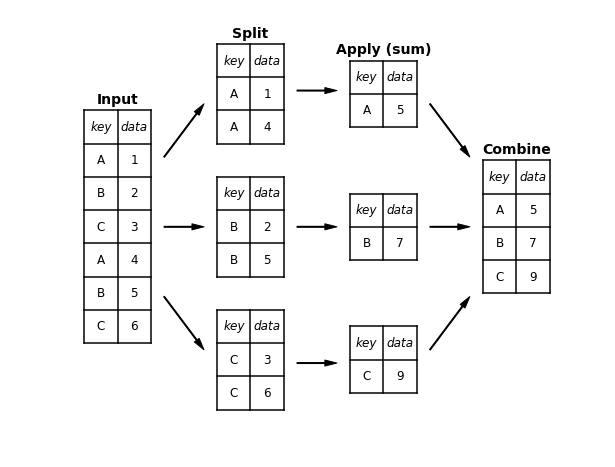

In [5]:
import matplotlib.pyplot as plt

def draw_dataframe(df, loc=None, width=None, ax=None, linestyle=None,
                   textstyle=None):
    loc = loc or [0, 0]
    width = width or 1

    x, y = loc

    if ax is None:
        ax = plt.gca()

    ncols = len(df.columns) + 1
    nrows = len(df.index) + 1

    dx = dy = width / ncols

    if linestyle is None:
        linestyle = {'color':'black'}

    if textstyle is None:
        textstyle = {'size': 12}

    textstyle.update({'ha':'center', 'va':'center'})

    # draw vertical lines
    for i in range(ncols + 1):
        plt.plot(2 * [x + i * dx], [y, y + dy * nrows], **linestyle)

    # draw horizontal lines
    for i in range(nrows + 1):
        plt.plot([x, x + dx * ncols], 2 * [y + i * dy], **linestyle)

    # Create index labels
    for i in range(nrows - 1):
        plt.text(x + 0.5 * dx, y + (i + 0.5) * dy,
                 str(df.index[::-1][i]), **textstyle)

    # Create column labels
    for i in range(ncols - 1):
        plt.text(x + (i + 1.5) * dx, y + (nrows - 0.5) * dy,
                 str(df.columns[i]), style='italic', **textstyle)
        
    # Add index label
    if df.index.name:
        plt.text(x + 0.5 * dx, y + (nrows - 0.5) * dy,
                 str(df.index.name), style='italic', **textstyle)

    # Insert data
    for i in range(nrows - 1):
        for j in range(ncols - 1):
            plt.text(x + (j + 1.5) * dx,
                     y + (i + 0.5) * dy,
                     str(df.values[::-1][i, j]), **textstyle)


#----------------------------------------------------------
# Draw figure

import pandas as pd
df = pd.DataFrame({'data': [1, 2, 3, 4, 5, 6]},
                   index=['A', 'B', 'C', 'A', 'B', 'C'])
df.index.name = 'key'


fig = plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.axes([0, 0, 1, 1])

ax.axis('off')

draw_dataframe(df, [0, 0])

for y, ind in zip([3, 1, -1], 'ABC'):
    split = df[df.index == ind]
    draw_dataframe(split, [2, y])

    sum = pd.DataFrame(split.sum()).T
    sum.index = [ind]
    sum.index.name = 'key'
    sum.columns = ['data']
    draw_dataframe(sum, [4, y + 0.25])
    
result = df.groupby(df.index).sum()
draw_dataframe(result, [6, 0.75])

style = dict(fontsize=14, ha='center', weight='bold')
plt.text(0.5, 3.6, "Input", **style)
plt.text(2.5, 4.6, "Split", **style)
plt.text(4.5, 4.35, "Apply (sum)", **style)
plt.text(6.5, 2.85, "Combine", **style)

arrowprops = dict(facecolor='black', width=1, headwidth=6)
plt.annotate('', (1.8, 3.6), (1.2, 2.8), arrowprops=arrowprops)
plt.annotate('', (1.8, 1.75), (1.2, 1.75), arrowprops=arrowprops)
plt.annotate('', (1.8, -0.1), (1.2, 0.7), arrowprops=arrowprops)

plt.annotate('', (3.8, 3.8), (3.2, 3.8), arrowprops=arrowprops)
plt.annotate('', (3.8, 1.75), (3.2, 1.75), arrowprops=arrowprops)
plt.annotate('', (3.8, -0.3), (3.2, -0.3), arrowprops=arrowprops)

plt.annotate('', (5.8, 2.8), (5.2, 3.6), arrowprops=arrowprops)
plt.annotate('', (5.8, 1.75), (5.2, 1.75), arrowprops=arrowprops)
plt.annotate('', (5.8, 0.7), (5.2, -0.1), arrowprops=arrowprops)
    
plt.axis('equal')
plt.ylim(-1.5, 5);

This makes clear that the `groupby` accomplishes:
1. The **split** step involves breaking up and grouping a `DataFrame` depending on the value of the specified key.
2. The **apply** step involves computing some function,usually an aggregate,transformation or filtering,within the individual groups.
3. The **combine** step merges the results of these operations into an output array.

In [6]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [7]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


## The GroupBy object

In [8]:
df.groupby('key')

Notice that what is returned is not a set of `DataFrame`s,but a `DataFrameGroupBy` object.This object is where the magic is:you can think of it as a special view of the `DataFrame`,which is poised to dig into the groups but does no actual computation until the aggregation is applied.This "lazy evaluation" approach means that common aggregates can be implemented very efficiently in a way that is almost transparent to the user.

### Column indexing

In [10]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [11]:
planets.groupby('method')

In [12]:
planets.groupby('method')['orbital_period']

Here we've selected a particular `Series` group from the original `DataFrame` group by reference to its column name.As with the `GroupBy` object,no computation is done until we call some aggregate on the object:

In [14]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

### Iteration over groups

In [16]:
for method,group in planets.groupby('method'):
    print("{0:30s} shape{1}".format(method,group.shape)) 

Astrometry                     shape(2, 6)
Eclipse Timing Variations      shape(9, 6)
Imaging                        shape(38, 6)
Microlensing                   shape(23, 6)
Orbital Brightness Modulation  shape(3, 6)
Pulsar Timing                  shape(5, 6)
Pulsation Timing Variations    shape(1, 6)
Radial Velocity                shape(553, 6)
Transit                        shape(397, 6)
Transit Timing Variations      shape(4, 6)


### Dispatch methods
Through some Python class magic,any method not explicitly implemented by the `GroupBy` object will be passed through and called on the groups,whether they are `DataFrame` or `Series` objects.

In [19]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [20]:
a=planets.groupby('method')['year'].describe()

## Aggregate,filter,transform,apply

In [25]:
import numpy as np
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


### Aggregation
We're now familiar with `GroupBy` aggregations with `sum()`,`median()`,and the like,but the `aggregate()` method allows for even more flexibility.It can take a string,a function,or a list thereof,and compute all the aggregates at once.

In [26]:
df.groupby('key').aggregate(['min',np.median,max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [27]:
df.groupby('key').aggregate({'data1':'min',
                            'data2':'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


### Filtering
A filtering operation allows you to drop data based on the group properties.For example,we might want to keep all groups in which the standard deviation is larger than some critical value:

`DataFrameGroupBy.filter(func,dropna=True,*args,**kwargs)`

In [34]:
def filter_func(x):
    return x['data2'].std()>4

display('df','df.groupby("key").std()','df.groupby("key").filter(filter_func)')

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby("key").std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby("key").filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

### Transformation
While aggregate must return a reduced version of the data,transformation can return some transformed version of the full data to recombine.For such a transformation,the output is the same shape as the input.

In [38]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


### The `apply()` method
The `apply()` method lets you apply an arbitrary function to the group results.**The function should take a `DataFrame`,and return either a Pandas object (e.g.,`DataFrame`,`Series`) or a scalar**;the combine operation will be tailored to the type fo output returned.

In [39]:
# normalize the first column by the sum of the second
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1']/=x['data2'].sum()
    return x

display('df','df.groupby("key").apply(norm_by_data2)')

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3


In [29]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [31]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


## `resample()`,`expanding()` and `rolling()`  as methods on groupbys

In [72]:
df_re = pd.DataFrame({'A': [1] * 10 + [5] * 10,
                      'B': np.arange(20)})

df_re.head()

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4


In [73]:
df_re.groupby('A').rolling(4).B.mean()

A    
1  0      NaN
   1      NaN
   2      NaN
   3      1.5
   4      2.5
   5      3.5
   6      4.5
   7      5.5
   8      6.5
   9      7.5
5  10     NaN
   11     NaN
   12     NaN
   13    11.5
   14    12.5
   15    13.5
   16    14.5
   17    15.5
   18    16.5
   19    17.5
Name: B, dtype: float64

In [74]:
df_re = pd.DataFrame({'date': pd.date_range(start='2016-01-01',
                              periods=4,
                      freq='W'),
                     'group': [1, 1, 2, 2],
                     'val': [5, 6, 7, 8]}).set_index('date')

df_re

,group,val
date,,
2016-01-03,1,5
2016-01-10,1,6
2016-01-17,2,7
2016-01-24,2,8


In [75]:
df_re.groupby('group').resample('1D').ffill()

group  val
group date                  
1     2016-01-03      1    5
      2016-01-04      1    5
      2016-01-05      1    5
      2016-01-06      1    5
      2016-01-07      1    5
      2016-01-08      1    5
      2016-01-09      1    5
      2016-01-10      1    6
2     2016-01-17      2    7
      2016-01-18      2    7
      2016-01-19      2    7
      2016-01-20      2    7
      2016-01-21      2    7
      2016-01-22      2    7
      2016-01-23      2    7
      2016-01-24      2    8

## Specifying the split key
In the simple examples presented before,we split the `DataFrame` on a single column name.This is just one of many options by which the groups can be defined,and we'll go through some other options for group specification here.

### A list,array,series,or index providing the grouping keys
The key can be any series or list with a length matching that of the `DataFrame`.For example:

In [40]:
L=[0,1,0,1,2,0]
display('df','df.groupby(L).sum()')

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(L).sum()
   data1  data2
0      7     17
1      4      3
2      4      7

### A dictionary or series mapping index to group

```python
df2=df.set_index('key')
mapping={'A':'vowel','B':'consonant','C':'consonant'}
display('df2','df2.groupby(mapping).sum()')
```

### Any Python function
Similar to mapping,you can pass any Python function that will input the index value and output the group:

In [42]:
display('df2','df2.groupby(str.lower).mean()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
a,1.5,4.0
b,2.5,3.5


### A list of valid keys
Further,any of the preceding key choices can be combined to group on a multi-index:

In [43]:
df2.groupby([str.lower,mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


## Other useful features
### Automatic exclusion of 'nuisance' columns
refer to [this link](https://pandas.pydata.org/pandas-docs/stable/groupby.html#automatic-exclusion-of-nuisance-columns)

### Grouping with Grouper specification `pd.Grouper`

You may need to specify a bit more data to properly group.You can use the `pd.Grouper` to provide this local control

In [83]:
import datetime

df = pd.DataFrame({
         'Branch' : 'A A A A A A A B'.split(),
         'Buyer': 'Carl Mark Carl Carl Joe Joe Joe Carl'.split(),
         'Quantity': [1,3,5,1,8,1,9,3],
         'Date' : [
             datetime.datetime(2013,1,1,13,0),
             datetime.datetime(2013,1,1,13,5),
             datetime.datetime(2013,10,1,20,0),
             datetime.datetime(2013,10,2,10,0),
             datetime.datetime(2013,10,1,20,0),
             datetime.datetime(2013,10,2,10,0),
             datetime.datetime(2013,12,2,12,0),
             datetime.datetime(2013,12,2,14,0),
             ]
         })


df

,Branch,Buyer,Date,Quantity
0,A,Carl,2013-01-01 13:00:00,1
1,A,Mark,2013-01-01 13:05:00,3
2,A,Carl,2013-10-01 20:00:00,5
3,A,Carl,2013-10-02 10:00:00,1
4,A,Joe,2013-10-01 20:00:00,8
5,A,Joe,2013-10-02 10:00:00,1
6,A,Joe,2013-12-02 12:00:00,9
7,B,Carl,2013-12-02 14:00:00,3


In [84]:
# groupby a specific column with the desired frequency.This is like resampling

df.groupby([pd.Grouper(freq='M',key='Date'),'Buyer']).sum()

Quantity
Date       Buyer          
2013-01-31 Carl          1
           Mark          3
2013-10-31 Carl          6
           Joe           9
2013-12-31 Carl          3
           Joe           9

In [85]:
df=df.set_index('Date')
df

,Branch,Buyer,Quantity
Date,,,
2013-01-01 13:00:00,A,Carl,1
2013-01-01 13:05:00,A,Mark,3
2013-10-01 20:00:00,A,Carl,5
2013-10-02 10:00:00,A,Carl,1
2013-10-01 20:00:00,A,Joe,8
2013-10-02 10:00:00,A,Joe,1
2013-12-02 12:00:00,A,Joe,9
2013-12-02 14:00:00,B,Carl,3


In [88]:
df.groupby(['Buyer',pd.Grouper(freq='6M',level='Date')]).sum()

Quantity
Buyer Date                
Carl  2013-01-31         1
      2014-01-31         9
Joe   2014-01-31        18
Mark  2013-01-31         3

### Plotting

A         AxesSubplot(0.1,0.15;0.363636x0.75)
B    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

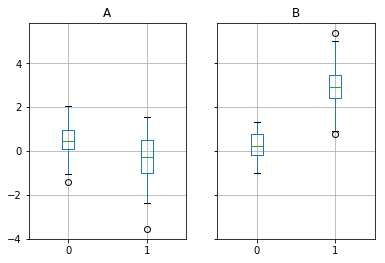

In [89]:
np.random.seed(1234)

df = pd.DataFrame(np.random.randn(50, 2))

df['g'] = np.random.choice(['A', 'B'], size=50)

df.loc[df['g'] == 'B', 1] += 3

df.groupby('g').boxplot()

### Piping function calls
refe to https://pandas.pydata.org/pandas-docs/stable/groupby.html#piping-function-calls

## Grouping example

In [44]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [45]:
planets.shape

(1035, 6)

In [48]:
#count discovered planets by method and decade
decade=10*(planets['year']//10)
decade=decade.astype(str)+'s'
decade.name='decade'
planets.groupby(['method',decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


```python
def get_sd():
    #sd
    ri=read_df('stockRetD','D')
    def _rolling_for_one_sid(s):
        ns=s.dropna()
        yearMonth=lambda x:x+MonthEnd(0)
        # filter out those month with observations less than BETA_THRESH
        filtered=ns.groupby(ns.index.month).filter(lambda x:x.shape[0]>BETA_THRESH)
        # group by month
        return filtered.groupby(yearMonth).apply(lambda s:s.std())

    sd=ri.apply(_rolling_for_one_sid)
    sd.to_csv(os.path.join(PATH,'sd.csv'))
```

# Reshaping
## `stack` and `unstack`
Notice:
1. `stack` will dropna by default that means,if df.stack().unstack() may not equal df,since df.stack() may delete some rows

In [7]:
import pandas as pd
import numpy as np
_df=pd.DataFrame([[np.nan]*4,
                [np.nan,1,2,np.nan],
                 [np.nan,1,2,3]])
_df

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,NaN,1.0,2.0,NaN
2,NaN,1.0,2.0,3.0


In [8]:
_df.stack()

1  1    1.0
   2    2.0
2  1    1.0
   2    2.0
   3    3.0
dtype: float64

In [9]:
_df.shape[0]*_df.shape[1]==_df.stack().shape[0]

False

In [10]:
_df.stack().unstack()

,1,2,3
1,1.0,2.0,NaN
2,1.0,2.0,3.0


### example

In [52]:
tuples=list(zip(*[['bar','bar','baz','baz',
                  'foo','foo','qux','qux'],
                 ['one','two','one','two',
                 'one','two','one','two']]))

index=pd.MultiIndex.from_tuples(tuples,names=['first','second'])
df=pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])
df2=df[:4]
df2

A         B
first second                    
bar   one     0.250372  0.793935
      two    -0.511602  0.253874
baz   one     0.188971  0.534767
      two    -1.467865  0.759857

The `stack()` method 'compresses' a level in the DataFrame's columns

In [53]:
stacked=df2.stack()
stacked

first  second   
bar    one     A    0.250372
               B    0.793935
       two     A   -0.511602
               B    0.253874
baz    one     A    0.188971
               B    0.534767
       two     A   -1.467865
               B    0.759857
dtype: float64

With a 'stacked' DataFrame or Series (having a `MultiIndex` as the index),the inverse operation of `stack()` is `unstack(0`,which by default unstacks the **last level**.

In [54]:
stacked.unstack()

A         B
first second                    
bar   one     0.250372  0.793935
      two    -0.511602  0.253874
baz   one     0.188971  0.534767
      two    -1.467865  0.759857

In [55]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.250372 -0.511602
      B  0.793935  0.253874
baz   A  0.188971 -1.467865
      B  0.534767  0.759857

In [56]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.250372  0.188971
       B  0.793935  0.534767
two    A -0.511602 -1.467865
       B  0.253874  0.759857

## pivot tables

The pivot table takes simple comlun-wise data as input,and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.The difference between pivot tables and `GroupBy` can sometimes cause confusion;it helps me to think of pivot tables as essentially a **multidimensional** version of `GroupBy` aggregation.That is ,you split-apply-combine,but both the split and the combina happen across not a one-dimensional index,but across a two-dimensional grid.

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Pivot Tables by hand

In [50]:
titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Pivot table syntax

In [52]:
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### Multi-level pivot tables

In [53]:
age=pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [54]:
fare=pd.qcut(titanic['fare'],2)
titanic.pivot_table('survived',['sex',age],[fare,'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

#### Additional pivot table options
```python
pandas.pivot_table(data,values=None,index=None,columns=None,aggfunc='mean',fill_value=None,margins=False,dropna=True,margins_name='All')
```
The `aggfunc` keyword controls what type of aggregation is applied,which is mean by default.As in the GroupBy,the aggregation specification can be a string representing one of several common choices (e.g.,`'sum'`,`'mean'`,`'count'`,`'min'`,`'max'`,etc) or a function that implements an aggregation (e.g.,`'np.sum()'`,`'min()'`,`'sum()'`,etc.).Additionally,it can be specified as a dictionary mapping a column to any of the above desired options:

In [60]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':'sum', 'fare':'mean'})


fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

Notice also here that we've omitted the `values` keyword;when specifying a mapping for `aggfunc`,this is determined automatically.

At times it's useful to compute totals along each grouping.This can be done via the `margins` keyword:

In [61]:
titanic.pivot_table('survived',index='sex',columns='class',margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [57]:
df=pd.DataFrame({'A':['one','one','two','three']*3,
                'B':['A','B','C']*4,
                'C':['foo','foo','foo','bar','bar','bar']*2,
                'D':np.random.randn(12),
                'E':np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.362576,-0.130319
1,one,B,foo,-1.508851,-0.630343
2,two,C,foo,1.066129,-1.513581
3,three,A,bar,2.145286,-1.427766
4,one,B,bar,-0.031457,-0.579057
5,one,C,bar,-2.182307,1.544820
6,two,A,foo,-0.536472,-1.503125
7,three,B,foo,0.191586,-0.088556
8,one,C,foo,0.752837,0.675200
9,one,A,bar,0.485836,-1.740251


In [58]:
pd.pivot_table(df,values='D',index=['A','B'],columns=['C'])

C             bar       foo
A     B                    
one   A  0.485836 -0.362576
      B -0.031457 -1.508851
      C -2.182307  0.752837
three A  2.145286       NaN
      B       NaN  0.191586
      C  0.237018       NaN
two   A       NaN -0.536472
      B -0.198486       NaN
      C       NaN  1.066129

# Vectorized String Operations
## Introducing Pandas String operations

In [62]:
data=['peter','paul',None,'Mary','gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

Notice that it will break if there are any missing values.Pandas includes features to address this need for vectorized string operations and for correctly handling misssing data via the `str` Pandas series and index objects containing strings.

In [64]:
names=pd.Series(data)
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

## Tables of Pandas string methods

In [66]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

### Methods similar to Python string methods
Nearly all Python's built-in string methods are mirrored by a Pandas vectorized string method. Here is a list of Pandas ``str`` methods that mirror Python string methods:

|             |                  |                  |                  |
|-------------|------------------|------------------|------------------|
|``len()``    | ``lower()``      | ``translate()``  | ``islower()``    | 
|``ljust()``  | ``upper()``      | ``startswith()`` | ``isupper()``    | 
|``rjust()``  | ``find()``       | ``endswith()``   | ``isnumeric()``  | 
|``center()`` | ``rfind()``      | ``isalnum()``    | ``isdecimal()``  | 
|``zfill()``  | ``index()``      | ``isalpha()``    | ``split()``      | 
|``strip()``  | ``rindex()``     | ``isdigit()``    | ``rsplit()``     | 
|``rstrip()`` | ``capitalize()`` | ``isspace()``    | ``partition()``  | 
|``lstrip()`` |  ``swapcase()``  |  ``istitle()``   | ``rpartition()`` |

Notice that these have various return values. Some, like ``lower()``, return a series of strings:

In [68]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [69]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

### Methods using regular expressions

In addition, there are several methods that accept regular expressions to examine the content of each string element, and follow some of the API conventions of Python's built-in ``re`` module:

| Method | Description |
|--------|-------------|
| ``match()`` | Call ``re.match()`` on each element, returning a boolean. |
| ``extract()`` | Call ``re.match()`` on each element, returning matched groups as strings.|
| ``findall()`` | Call ``re.findall()`` on each element |
| ``replace()`` | Replace occurrences of pattern with some other string|
| ``contains()`` | Call ``re.search()`` on each element, returning a boolean |
| ``count()`` | Count occurrences of pattern|
| ``split()``   | Equivalent to ``str.split()``, but accepts regexps |
| ``rsplit()`` | Equivalent to ``str.rsplit()``, but accepts regexps |

In [74]:
monte.str.extract('([A-Za-z]+)',expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [75]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

### Miscellaneous methods
Finally, there are some miscellaneous methods that enable other convenient operations:

| Method | Description |
|--------|-------------|
| ``get()`` | Index each element |
| ``slice()`` | Slice each element|
| ``slice_replace()`` | Replace slice in each element with passed value|
| ``cat()``      | Concatenate strings|
| ``repeat()`` | Repeat values |
| ``normalize()`` | Return Unicode form of string |
| ``pad()`` | Add whitespace to left, right, or both sides of strings|
| ``wrap()`` | Split long strings into lines with length less than a given width|
| ``join()`` | Join strings in each element of the Series with passed separator|
| ``get_dummies()`` | extract dummy variables as a dataframe |

#### Vectorized item access and slicing

The ``get()`` and ``slice()`` operations, in particular, enable vectorized element access from each array.
For example, we can get a slice of the first three characters of each array using ``str.slice(0, 3)``.
Note that this behavior is also available through Python's normal indexing syntax–for example, ``df.str.slice(0, 3)`` is equivalent to ``df.str[0:3]``:

In [76]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [77]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

#### Indicator variables

Another method that requires a bit of extra explanation is the ``get_dummies()`` method.
This is useful when your data has a column containing some sort of coded indicator.
For example, we might have a dataset that contains information in the form of codes, such as A="born in America," B="born in the United Kingdom," C="likes cheese," D="likes spam":

In [78]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,info,name
0,B|C|D,Graham Chapman
1,B|D,John Cleese
2,A|C,Terry Gilliam
3,B|D,Eric Idle
4,B|C,Terry Jones
5,B|C|D,Michael Palin


In [79]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


## snippets
refer to [this link](https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python)
```python
df['newcol']='new_'+df['col'].astype(str)

dataframe["period"] = dataframe["Year"].map(str) + dataframe["quarter"]

df = pd.DataFrame({'Year': ['2014', '2015'], 'quarter': ['q1', 'q2']})
df['period'] = df[['Year', 'quarter']].apply(lambda x: ''.join(x), axis=1)
```

# Time Series
**Time stamps** reference particular moments in time(e.g.,July 4th,2015 at 7:00am).  
**Time interval** and **periods** reference a length of time between a particular beginning and end point;for example,the year 2015.  
**Time deltas** or **durations** reference an exact length of time(e.g., a duration of 22.56 seconds).
## Dates and Times in Python
### Native python datas and times:`datetime` and `dateutil`

In [81]:
from datetime import datetime
datetime(year=2015,month=7,day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [83]:
from dateutil import parser
date=parser.parse('4th of July,2015')
date

datetime.datetime(2015, 7, 4, 0, 0)

### Typed arrays of times:NumPy's `datetime64`

In [84]:
date=np.array('2015-07-04',dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

Once we have this date formatted,however,we can quickly to vectorized operations on it:

In [85]:
date+np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

### Dates and times in pandas:best of both worlds

In [86]:
date=pd.to_datetime('4th of July,2015')
date

Timestamp('2015-07-04 00:00:00')

In [87]:
date+pd.to_timedelta(np.arange(12),'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas time series:Indexing by time
Where the pandas time series tools really become useful is when you begin to **index data** by ***timestamps***.For example,we can construct a `Series` object that has time indexed data:

In [88]:
index=pd.DatetimeIndex(['2014-07-04','2014-08-04',
                       '2015-07-04','2015-08-04'])
data=pd.Series([0,1,2,3],index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [89]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [90]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas Time Series Data Structures
For ***Time stamps***,Pandas provides the `Timestamp` type.As mentioned before,it is essentially a replacement for Python's native `datetime`,but is based on the more efficient `numpy.datetime64` data type.The associated index structure is `DatetimeIndex`.   

For ***time Periods***,Pandas provides the `period` type.This encodes a fixed-frequency interval based on `numpy.datetime64`.The associated index structure is `PeriodIndex`.  

For ***time deltas*** or ***durations***,Pandas provides the `datetime.timedelta` type,and is based on `numpy.timedelta64`.The associated index structure is `TimedeltaIndex`.

| class |remarks|how to create|
|-------|----|----|
|Timestamp|Represents a single timestamp|`to_datetime`,`Timestamp`|
|DatetimeIndex|Index of `Timestamp`|`to_datetime`,`date_range`,`bdate_range`,`DatetimeIndex`|
|Period|Represents a single time sapn|`Period`|
|PeriodIndex|Index of `Period`|`period_range`,`PeriodIndex`|

In [91]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any `DatetimeIndex` can be converted to a `periodIndex` with the `to_period()` function with the addition of a frequency code.

In [92]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

A `TimedeltaIndex` is created,for example,when a date is substracted from another.

In [93]:
dates-dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences:`pd.date_range()`
- `pd.date_range()` for timestamps
- `pd.period_range()` for periods
- `pd.timedelta_range()` for time deltas

In [94]:
pd.date_range('2018-02-01','2018-02-07')

DatetimeIndex(['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04',
               '2018-02-05', '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', freq='D')

In [95]:
pd.date_range('2018-01-01',periods=8)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [97]:
pd.period_range('2018-01-01',periods=8,freq='M')

PeriodIndex(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
             '2018-07', '2018-08'],
            dtype='period[M]', freq='M')

In [98]:
pd.timedelta_range(0,periods=10,freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## Frequencies and Offsets

Fundamental to these Pandas time series tools is the concept of a frequency or date offset.
Just as we saw the ``D`` (day) and ``H`` (hour) codes above, we can use such codes to specify any desired frequency spacing.
The following table summarizes the main codes available:  

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period.
By adding an ``S`` suffix to any of these, they instead will be marked at the beginning:  

| Code    | Description            || Code    | Description            |
|---------|------------------------||---------|------------------------|
| ``MS``  | Month start            ||``BMS``  | Business month start   |
| ``QS``  | Quarter start          ||``BQS``  | Business quarter start |
| ``AS``  | Year start             ||``BAS``  | Business year start    |

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

- ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
- ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:

- ``W-SUN``, ``W-MON``, ``W-TUE``, ``W-WED``, etc.

On top of this, codes can be combined with numbers to specify other frequencies.
For example, for a frequency of 2 hours 30 minutes, we can combine the hour (``H``) and minute (``T``) codes as follows:

In [99]:
pd.timedelta_range(0,periods=9,freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the ``pd.tseries.offsets`` module.
For example, we can create a business day offset directly as follows:

In [100]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01',periods=5,freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## end-of-month
refer to [this link](https://gist.github.com/zhanghaitao1/78dc02ad0e7630ee8f091c011ca0ce80)

In [1]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd,YearEnd
d=pd.Timestamp('2014-03-07 09:00')
d+MonthEnd(0)

Timestamp('2014-03-31 09:00:00')

In [2]:
d+YearEnd(0)

Timestamp('2014-12-31 09:00:00')

## `asfreq()`
`asfreq()` is basically a thin,but convenient wrapper around `reindex` which generates a `date_range` and calls `reindex`.

In [86]:
from pandas.tseries.offsets import BDay
from numpy.random import randn
dr=pd.date_range('1/1/2000',periods=3,freq=3*BDay())
ts=pd.Series(randn(3),index=dr)
ts

2000-01-03    0.191598
2000-01-06   -0.240965
2000-01-11    0.538529
Freq: 3B, dtype: float64

In [87]:
ts.asfreq(BDay())

2000-01-03    0.191598
2000-01-04         NaN
2000-01-05         NaN
2000-01-06   -0.240965
2000-01-07         NaN
2000-01-10         NaN
2000-01-11    0.538529
Freq: B, dtype: float64

`asfreq` provides a further convenience so you can specify an interpolation method for any gaps that may appear after the frequency conversion.

In [88]:
ts.asfreq(BDay(),method='pad')

2000-01-03    0.191598
2000-01-04    0.191598
2000-01-05    0.191598
2000-01-06   -0.240965
2000-01-07   -0.240965
2000-01-10   -0.240965
2000-01-11    0.538529
Freq: B, dtype: float64

## `Resampling`,`Shifting`,and `Windowing`

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;
seaborn.set()

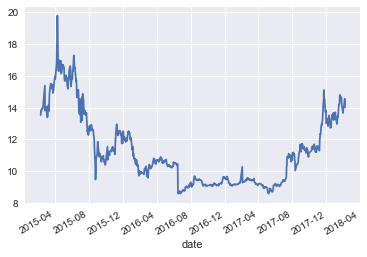

In [115]:
import tushare as ts
stock=ts.get_hist_data('000001')
stock=stock[::-1]
stock.index=pd.to_datetime(stock.index)
stock.head()

stock=stock['close']
stock.plot();

### Resampling and converting frequencies
One common need for time series data is resampling at a higher or lower freqency.This can be done using the `resample()` method,or the much simpler `asfreq()` method.The primary difference between the two is that `reample()` is fundamentally a ***data aggregation***,while `asfreq()` is fundamentally a ***data selection***.   
Tips:  
1. resample('M').last() will convert the month-end to calendar date rather than trading date. 


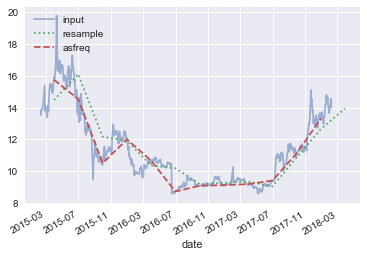

In [121]:
stock.plot(alpha=0.5,style='-')
stock.resample('BQ').mean().plot(style=':')
stock.asfreq('BQ').plot(style='--')
plt.legend(['input','resample','asfreq'],
          loc='upper left');

Notice the difference:at each point,`resample` reports the ***average of the previous year***,while `asfreq` reports the ***value at the end of the year***.

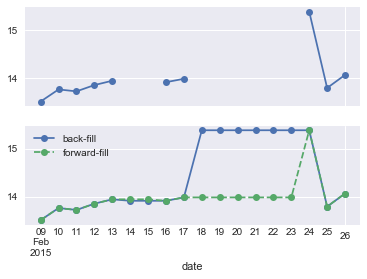

In [123]:
fig, ax = plt.subplots(2, sharex=True)
data = stock.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

### Time-shifts
The difference between them is that `shift()` ***shifts the data***,while `tshift()` ***shifts the index***.

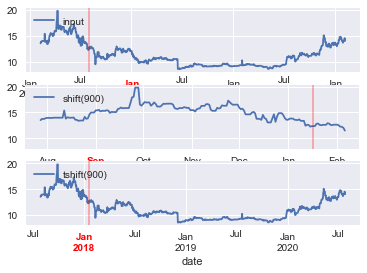

In [128]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
stock = stock.asfreq('D', method='pad')

stock.plot(ax=ax[0])
stock.shift(900).plot(ax=ax[1])
stock.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2015-08-01')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

### `Rolling` windows

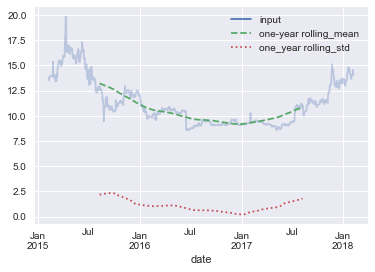

In [130]:
# one-year centered rolling mean and standard deviation of the stock prices
rolling=stock.rolling(365,center=True)
data=pd.DataFrame({'input':stock,
                  'one-year rolling_mean':rolling.mean(),
                  'one_year rolling_std':rolling.std()})
ax=data.plot(style=['-','--',':'])
ax.lines[0].set_alpha(0.3)

As with group-by operations,the `aggregate()` and `apply()` methods can be used for custom rolling computations

In [62]:
ps=ts.to_period()
ps

2018-01   -0.277479
2018-02    0.557480
2018-03    2.367152
2018-04    1.481196
2018-05   -2.018723
Freq: M, dtype: float64

## resampling

In [59]:
import tushare as ts

pa=ts.get_hist_data('000001')
pa.index=pd.to_datetime(pa.index)
pa.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2018-04-04,10.68,11.01,10.87,10.60,1602488.75,0.31,2.94,10.818,10.985,11.446,1137065.38,1208185.15,1092526.13,0.95
2018-04-03,10.60,10.67,10.56,10.51,890745.69,-0.15,-1.40,10.822,11.088,11.505,1036372.30,1192447.23,1083780.21,0.53
2018-04-02,10.87,10.99,10.71,10.70,1109316.38,-0.19,-1.74,10.898,11.214,11.582,1079009.89,1180987.66,1096751.05,0.66
2018-03-30,11.04,11.05,10.90,10.88,752173.69,-0.15,-1.36,10.942,11.326,11.640,1133866.31,1150909.90,1078994.39,0.44
2018-03-29,10.92,11.17,11.05,10.55,1330602.38,0.16,1.47,11.030,11.400,11.692,1348569.73,1171990.86,1074541.91,0.79


In [60]:
pa=pa.sort_index()
close=pa['close']
close.head()

date
2015-04-07    16.81
2015-04-08    17.92
2015-04-09    18.00
2015-04-10    19.80
2015-04-13    16.54
Name: close, dtype: float64

`Series.resample(freq)` is a class called " DatetimeIndexResampler" which groups data in a Series object into regular time intervals.The argument 'freq' determines teh length of each interval.  

`Series.resample.mean()` is a complete statement that groups data into intervals,and then compute the mean of each interval.For example，if we want to aggregate the daily data into monthly data by mean：

In [54]:
by_month=close.resample('M').mean()
by_month.head()

date
2015-04-30    16.946111
2015-05-31    15.896000
2015-06-30    15.629524
2015-07-31    13.517826
2015-08-31    11.902857
Freq: M, Name: close, dtype: float64

We can also aggregate the data by week:

In [55]:
by_week=close.resample('W').mean()
by_week.head()

date
2015-04-12    18.1325
2015-04-19    16.6840
2015-04-26    16.5220
2015-05-03    16.6175
2015-05-10    15.9240
Freq: W-SUN, Name: close, dtype: float64

We can choose almost any frequency by using the format `nf`,where 'n' is an integer and 'f' is M for month,W for week and D for day.  
```python
three_day=close.resample('3D').mean()
two_week=close.resample('2W').mean()
two_month=close.resample('2M').mean()
```

Besides the mean() method,other methods can also be used with the resampler:
```python
std=close.resample('W').std()
max=close.resample('W').max()
min=close.resmaple('W').min()
```

Often we want to calculate monthly returns of a stock，based on prices on the last of each month.To fetch those prices,we use the `series.resample.agg()` method:

In [56]:
last_day=close.resample('M').agg(lambda x:x[-1])
#equal to df2=df.groupby(lambda dt:dt+MonthEnd(0)).apply(lambda x:x.iloc[-1,:])
last_day.head()

date
2015-04-30    16.70
2015-05-31    15.32
2015-06-30    14.54
2015-07-31    12.36
2015-08-31    11.07
Freq: M, Name: close, dtype: float64

Or directly calculate the monthly rates of return using the data for the first day and the last day:

In [58]:
monthly_return=close.resample('M').agg(lambda x:x[-1]/x[0]-1)
monthly_return.head()

date
2015-04-30   -0.006544
2015-05-31   -0.072639
2015-06-30   -0.085535
2015-07-31   -0.112069
2015-08-31   -0.136505
Freq: M, Name: close, dtype: float64

## `asfreq` vs `resample`
`asfreq()` is basically a thin,but convenient wrapper around `reindex` which generates a `date_range` and calls `reindex`. 

Both of them will return a new object with index as the end of the period inverval,which is determined by the given frequency.

In [8]:
import pandas as pd
import numpy as np

date=pd.date_range('2018-02-01','2018-04-10',freq='D')
s=pd.Series(range(len(date)),index=date)
s=s[:3].append(s[30:32]).append(s[-3:])
s[3:6]=np.nan
s[-1]=np.nan
s

2018-02-01     0.0
2018-02-02     1.0
2018-02-03     2.0
2018-03-03     NaN
2018-03-04     NaN
2018-04-08     NaN
2018-04-09    67.0
2018-04-10     NaN
dtype: float64

```python
s.asfreq(freq='M')
```
is equal to 
```python
s.reindex(pd.date_range(s.index[0],s.index[-1],freq='M')
```

In [9]:
# equal to date_range and then reindex,that is, s.reindex(pd.date_range(s.index[0],s.index[-1],freq='M))
s.asfreq(freq='M')

2018-02-28   NaN
2018-03-31   NaN
Freq: M, dtype: float64

In [10]:
s.reindex(pd.date_range(s.index[0],s.index[-1],freq='M'))

2018-02-28   NaN
2018-03-31   NaN
Freq: M, dtype: float64

This two is equal
```python
s.resample('M').agg(lambda x:x[-1]) 

s.groupby(lambda x:x+MonthEnd(0)).agg(lambda x:x[-1])
```
But they ***Do not *** equal
```python
s.resample('M').last()
```

The first two method will first group the data monthly and then slice the last row.  
The last method will first group the data monthly and then select the last nonnan data.

In [11]:
s.resample('M').agg(lambda x:x[-1])

2018-02-28    2.0
2018-03-31    NaN
2018-04-30    NaN
Freq: M, dtype: float64

In [12]:
from pandas.tseries.offsets import MonthEnd

s.groupby(lambda x:x+MonthEnd(0)).agg(lambda x:x[-1])

2018-02-28    2.0
2018-03-31    NaN
2018-04-30    NaN
dtype: float64

In [13]:
s.resample('M').last()

2018-02-28     2.0
2018-03-31     NaN
2018-04-30    67.0
Freq: M, dtype: float64

In [14]:
s.resample('M').agg(lambda x:x[0])

2018-02-28    0.0
2018-03-31    NaN
2018-04-30    NaN
Freq: M, dtype: float64

In [15]:
s.resample('M').first()

2018-02-28     0.0
2018-03-31     NaN
2018-04-30    67.0
Freq: M, dtype: float64

In [16]:
s.asfreq('W')

2018-02-04   NaN
2018-02-11   NaN
2018-02-18   NaN
2018-02-25   NaN
2018-03-04   NaN
2018-03-11   NaN
2018-03-18   NaN
2018-03-25   NaN
2018-04-01   NaN
2018-04-08   NaN
Freq: W-SUN, dtype: float64

In [17]:
s.resample('W').mean()

2018-02-04     1.0
2018-02-11     NaN
2018-02-18     NaN
2018-02-25     NaN
2018-03-04     NaN
2018-03-11     NaN
2018-03-18     NaN
2018-03-25     NaN
2018-04-01     NaN
2018-04-08     NaN
2018-04-15    67.0
Freq: W-SUN, dtype: float64

## Time-aware Rolling vs. Resampling
When using `.rolling()` with an offset.The offset is a time-delta.Take a backwards-in-time looking window,and aggregate all of the values in that window(**including the end-point,but not the start-point**).This is the new value at that point in the result.These are variable sized windows in time-space for each point of the input.You will get a same sized result as the input.  

When using `.resample()` with an offset.Construct a new index that is the frequency of the offset.For each frequency bin,aggregate points from the input within a backwards-in-time looking window that fall in that bin.The result of this aggregation is the output for that frequency point.The windows are fixed size in the frequency space.Your result will have the shape of a regular frequency between the min and the max of the original input object.  

To summirize,`.rolling` is a time-based window operation,while `.resample()` is a frequency-based window operation.

## snippets
### `convert_freq`
```python

def convert_freq(x, freq):
    '''
    convert the date format,this funnction is useful,especially for dataframe

    :param x:array-like,usually it can be df.index
    :param freq: offsets from pandas.tseries.offsets,such as 'Y','M','D'
    :return:
    '''
    if freq=='M':
        return pd.to_datetime(x)+MonthEnd(0)
    elif freq=='D': #TODO: test with freq=='D'
        return pd.to_datetime(x)+Day(0)
    elif freq=='Y':
        #for freq=='Y',the element in x must be like 1995.
        return pd.to_datetime(x,format='%Y')+YearEnd()
```

### manipulate date index
```python
def get_bm():
    be=read_df('bps','M',DATA_PATH)
    be=be[be.index.month==12]
    me=read_df('stockCloseY','M',DATA_PATH)
    be,me=get_inter_frame([be,me])
    bm=be/me
    bm[bm<=0]=np.nan #delete those sample with bm<0
    bm=bm.shift(1,freq='6M')

    newIndex=pd.date_range(bm.index[0],bm.index[-1],freq='M')
    bm=bm.reindex(index=newIndex)
    bm=bm.fillna(method='ffill',limit=11)
    bm.to_csv(os.path.join(DATA_PATH,'bm.csv'))

    logbm=np.log(bm)
    logbm.to_csv(os.path.join(DATA_PATH,'logbm.csv'))

```

### convert frequency on multiIndex
The following two methods are equal:
`s.groupby(pd.Grouper(freq='M',level='trd_dt')).last()`
`s.resample('M',level='trd_dt').last()


# Window functions
## `rolling`

### `apply()`
The `apply` argument should be a single function that produces a single value from an ndarray input.Suppose we want to compute the mean absolute deviation on a rolling basis:

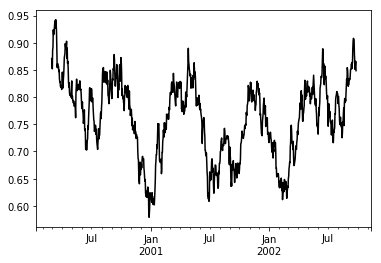

In [52]:
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

mad=lambda x:np.mean(np.fabs(x-np.mean(x)))

s.rolling(window=60).apply(mad).plot(style='k')

### Time-aware Rolling

In [54]:
dft = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]},
                   index = pd.Index([pd.Timestamp('20130101 09:00:00'),
                                     pd.Timestamp('20130101 09:00:02'),
                                     pd.Timestamp('20130101 09:00:03'),
                                     pd.Timestamp('20130101 09:00:05'),
                                     pd.Timestamp('20130101 09:00:06')],
                                    name='foo'))

dft

,B
foo,
2013-01-01 09:00:00,0.0
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,2.0
2013-01-01 09:00:05,NaN
2013-01-01 09:00:06,4.0


In [56]:
dft.rolling(2).sum()

,B
foo,
2013-01-01 09:00:00,NaN
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,3.0
2013-01-01 09:00:05,NaN
2013-01-01 09:00:06,NaN


In [57]:
# Notice that the result is different with rolling(2)
dft.rolling('2s').sum()

,B
foo,
2013-01-01 09:00:00,0.0
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,3.0
2013-01-01 09:00:05,NaN
2013-01-01 09:00:06,4.0


In [58]:
dft=dft.reset_index()

In [59]:
dft.rolling('2s',on='foo').sum()

,foo,B
0,2013-01-01 09:00:00,0.0
1,2013-01-01 09:00:02,1.0
2,2013-01-01 09:00:03,3.0
3,2013-01-01 09:00:05,NaN
4,2013-01-01 09:00:06,4.0


## Aggregation
Once the `Rolling`,`Expanding` or `EWM` objects have been created,several methods are available to perform mutiple computations on the data.These operations are similar to the `aggregation API`,`groupby API` and `resample API`.

In [60]:
dfa = pd.DataFrame(np.random.randn(1000, 3),
                   index=pd.date_range('1/1/2000', periods=1000),
                   columns=['A', 'B', 'C'])


r = dfa.rolling(window=60,min_periods=1)

In [62]:
r.aggregate(np.sum).head()

,A,B,C
2000-01-01,-0.716241,-1.997210,0.651719
2000-01-02,-0.642650,-1.212663,0.715720
2000-01-03,0.023663,0.680592,0.037071
2000-01-04,1.340070,0.107947,-0.633103
2000-01-05,0.443780,-1.406866,-1.402582


In [63]:
r[['A','B']].aggregate(np.sum).head()

,A,B
2000-01-01,-0.716241,-1.997210
2000-01-02,-0.642650,-1.212663
2000-01-03,0.023663,0.680592
2000-01-04,1.340070,0.107947
2000-01-05,0.443780,-1.406866


In [65]:
r['A'].agg([np.sum,np.mean,np.std]).head()

,sum,mean,std
2000-01-01,-0.716241,-0.716241,NaN
2000-01-02,-0.642650,-0.321325,0.558495
2000-01-03,0.023663,0.007888,0.693615
2000-01-04,1.340070,0.335017,0.865327
2000-01-05,0.443780,0.088756,0.929955


In [67]:
r.agg([np.sum,np.mean,np.std]).head()

A                             B                      \
                 sum      mean       std       sum      mean       std   
2000-01-01 -0.716241 -0.716241       NaN -1.997210 -1.997210       NaN   
2000-01-02 -0.642650 -0.321325  0.558495 -1.212663 -0.606331  1.967000   
2000-01-03  0.023663  0.007888  0.693615  0.680592  0.226864  2.004292   
2000-01-04  1.340070  0.335017  0.865327  0.107947  0.026987  1.684615   
2000-01-05  0.443780  0.088756  0.929955 -1.406866 -0.281373  1.613653   

                   C                      
                 sum      mean       std  
2000-01-01  0.651719  0.651719       NaN  
2000-01-02  0.715720  0.357860  0.415580  
2000-01-03  0.037071  0.012357  0.666686  
2000-01-04 -0.633103 -0.158276  0.642476  
2000-01-05 -1.402582 -0.280516  0.619916

In [70]:
r.agg({'A':[np.std,np.sum],
      'B':lambda x:np.std(x)}).head()

A                   B
                 std       sum  <lambda>
2000-01-01       NaN -0.716241  0.000000
2000-01-02  0.558495 -0.642650  1.390879
2000-01-03  0.693615  0.023663  1.636498
2000-01-04  0.865327  1.340070  1.458920
2000-01-05  0.929955  0.443780  1.443295

## Exponentially weighted Windows `.ewm`
refer to [offcial documents](https://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows)

# Categoricals

In [63]:
df=pd.DataFrame({'id':range(1,7),'raw_grade':['a','b','b','a','a','e']})

#convert the raw grades to a categorical data type
df['grade']=df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning toe `Series.cat.categories` is inplace!)

In [64]:
df['grade'].cat.categories=['very good','good','very bad']
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [65]:
df.sort_values(by='grade')

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


In [66]:
df.groupby('grade').size()

grade
very good    3
good         2
very bad     1
dtype: int64

# MultiIndexing

## creation
### directly

In [5]:
df=pd.DataFrame(np.random.rand(4,2),
               index=[['a','a','b','b'],[1,2,1,2]],
               columns=['data1','data2'])
df

data1     data2
a 1  0.410100  0.619059
  2  0.362220  0.420929
b 1  0.461519  0.485686
  2  0.121004  0.165463

In [6]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### Explicit MultiIndex constructors

In [7]:
pd.MultiIndex.from_arrays([['a','a','b','b'],[1,2,1,2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [8]:
pd.MultiIndex.from_tuples([('a',1),('a',2),('b',1),('b',2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [9]:
pd.MultiIndex.from_product([['a','b'],[1,2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [10]:
pd.MultiIndex(levels=[['a','b'],[1,2]],
             labels=[[0,0,1,1],[0,1,0,1]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

Any of these objects can be passed as the `index` argument when creating a `Series` or `DataFrame`,or be passed to the `reindex`method of an existing `Series` or `DataFrame`.

### MultiIndex level names
Sometimes it is convenient to name the levels of the `MultiIndex`.This can be accomplished by passing the `names` argument to any of the above `MultiIndex` constructors,or by setting the `names` attribute of the index after the fact:  
```python
df.index.names=['state','year']
```

## Indexing and Slicing a MultiIndex
### Multiply indexed Series

In [12]:
index = pd.MultiIndex.from_tuples(
    [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)])

populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [13]:
pop['California',2000]

33871648

In [15]:
pop['California']

2000    33871648
2010    37253956
dtype: int64

In [16]:
pop.loc['California':'New York']

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [17]:
pop[:,2000]

California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [18]:
pop[pop>22000000]

California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [19]:
pop[['California','Texas']]

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

### Multiply indexed DataFrames

In [20]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      48.0  36.8  51.0  36.5  31.0  37.5
     2      44.0  37.1  35.0  36.4  34.0  37.5
2014 1      32.0  37.3  40.0  35.9  22.0  38.0
     2      33.0  36.5  33.0  36.2  40.0  37.3

In [21]:
health_data['Guido','HR']

year  visit
2013  1        51.0
      2        35.0
2014  1        40.0
      2        33.0
Name: (Guido, HR), dtype: float64

In [22]:
health_data.iloc[:2,:2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      48.0  36.8
     2      44.0  37.1

In [23]:
health_data.loc[:,('Bob','HR')]

year  visit
2013  1        48.0
      2        44.0
2014  1        32.0
      2        33.0
Name: (Bob, HR), dtype: float64

### select based on one level

In [13]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.random((8,4)))
tupleList = list(zip([x for x in 'abcdefgh'], [y for y in 'iijjkkll']))
ind = pd.MultiIndex.from_tuples(tupleList)
df.index = ind
df        

,,0,1,2,3
a,i,0.028061,0.966445,0.756660,0.770940
b,i,0.213559,0.577095,0.728702,0.230548
c,j,0.445902,0.457052,0.317243,0.508528
d,j,0.195196,0.132979,0.411333,0.723980
e,k,0.761463,0.861726,0.349295,0.249236
f,k,0.206723,0.522171,0.283512,0.665866
g,l,0.903151,0.523384,0.390603,0.155275
h,l,0.937943,0.211139,0.645320,0.103825


In [19]:
# method1
df.loc[df.index.get_level_values(1).isin(['i','j'])]

,,0,1,2,3
a,i,0.028061,0.966445,0.756660,0.770940
b,i,0.213559,0.577095,0.728702,0.230548
c,j,0.445902,0.457052,0.317243,0.508528
d,j,0.195196,0.132979,0.411333,0.723980


In [20]:
# method2
idx=pd.IndexSlice
df.loc[idx[:,['j','k']],:]

,,0,1,2,3
c,j,0.445902,0.457052,0.317243,0.508528
d,j,0.195196,0.132979,0.411333,0.723980
e,k,0.761463,0.861726,0.349295,0.249236
f,k,0.206723,0.522171,0.283512,0.665866


In [21]:
# method3
df.index.names=['ind1','ind2']
df=df.reset_index()
df=df[df['ind2'].isin(['j','k'])]
df=df.set_index(['ind1','ind2'])
df

,,0,1,2,3
ind1,ind2,,,,
c,j,0.445902,0.457052,0.317243,0.508528
d,j,0.195196,0.132979,0.411333,0.723980
e,k,0.761463,0.861726,0.349295,0.249236
f,k,0.206723,0.522171,0.283512,0.665866


## Rearraging Multi-Indices
### Sorted and unsorted indices
***Many of the `MultiIndex` slicing operations will fail if the index is not sorted***.

In [25]:
#unsorted
index=pd.MultiIndex.from_product([['a','c','b'],[1,2]])
data=pd.Series(np.random.rand(6),index=index)
data.index.names=['char','int']
data

char  int
a     1      0.569218
      2      0.408730
c     1      0.849706
      2      0.541118
b     1      0.105430
      2      0.234574
dtype: float64

If we try to take a partial slice of this index,it will result in an error.

In [26]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


Although it is not entirely clea from the error message,this is the result of the MultiIndex not being sorted.

In [28]:
data=data.sort_index()
data

char  int
a     1      0.569218
      2      0.408730
b     1      0.105430
      2      0.234574
c     1      0.849706
      2      0.541118
dtype: float64

With the index sorted in this way,partial slicing will work as expected.

In [29]:
data['a':'b']

char  int
a     1      0.569218
      2      0.408730
b     1      0.105430
      2      0.234574
dtype: float64

### Stacking and unstacking indices

In [31]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [30]:
pop.unstack(level=0)

,California,New York,Texas
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [32]:
pop.unstack().stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### Index setting and resetting
Another way to rearrange hierarchical data is to turn the index labels into columns;this can be accomplished with the `reset_index` method.

In [33]:
pop_flat=pop.reset_index(name='population')
pop_flat

,level_0,level_1,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


It's useful to build a `MultiIndex` from the column values.This can be done with the `set_index` method of the `DataFrame`,which returns a multiply indexed `DataFrame`:

In [36]:
pop_flat.set_index(['level_0','level_1'])

population
level_0    level_1            
California 2000       33871648
           2010       37253956
New York   2000       18976457
           2010       19378102
Texas      2000       20851820
           2010       25145561

### `reorder_levels()` and `swaplevel()`

In [32]:
 midx = pd.MultiIndex(levels=[['zero', 'one'], ['x','y']],
                      labels=[[1,1,0,0],[1,0,1,0]])
 

 df = pd.DataFrame(np.random.randn(4,2), index=midx)
df

0         1
one  y -0.264345  0.601299
     x  0.254873 -1.308310
zero y -0.380348 -1.090919
     x  1.488190 -0.187670

In [33]:
df.swaplevel(0,1,axis=0)

,,0,1
y,one,-0.264345,0.601299
x,one,0.254873,-1.308310
y,zero,-0.380348,-1.090919
x,zero,1.488190,-0.187670


The `reorder_levels` function generalize the `swaplevel` function,allowing you to permute the hierarchical index levels in one step:

In [34]:
df.reorder_levels([1,0],axis=0)

,,0,1
y,one,-0.264345,0.601299
x,one,0.254873,-1.308310
y,zero,-0.380348,-1.090919
x,zero,1.488190,-0.187670


### Sorting a `MultiIndex`

In [35]:
df.sort_index(level=1)

,,0,1
zero,x,1.488190,-0.187670
one,x,0.254873,-1.308310
zero,y,-0.380348,-1.090919
one,y,-0.264345,0.601299


SyntaxError: invalid syntax (<ipython-input-36-38e9e33c87a8>, line 1)

## modify Multi-indices
Indexes are immutable and must be remade then modifying.

### method 1
1. usually,we we use `df.index.reset_index()` to convert multiIndex to singleIndex,and then modify the former index in DataFrame.After completing the modification,we use `df.set_index(colnames,drop=True)` to convert multiIndex back into singleIndex.  

### method 2
as [this link](https://stackoverflow.com/questions/29150346/pandas-modify-a-particular-level-of-multiindex)

## Examples

# Plotting

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026A09612A58>,
      dtype=object)

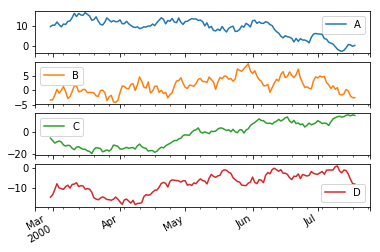

In [42]:
%matplotlib inline
df = pd.DataFrame(np.random.randn(200, 4),
                   index=pd.date_range('1/1/2000', periods=200),
                   columns=['A', 'B', 'C', 'D'])

# `subplot=True` make separate subplots for each column
df.rolling(window=60).sum().plot(subplots=True)

# Data In/Out

# examples
Some of the examples are from stackoverflow

## rename the columns

In [99]:
df=pd.DataFrame({'$a':[1,2],'$b':[10,20]})
df.rename(columns={'$a':'a','$b':'b'})

,a,b
0,1,10
1,2,20


In [100]:
df.rename(columns=lambda x:x[1:],inplace=False)

,a,b
0,1,10
1,2,20


In [101]:
df.columns=df.columns.str.replace('$','')
df

,a,b
0,1,10
1,2,20


## delete column from pandas DataFrame
The best way to do this in pandas is to use `drop`:  
```
df=df.drop('colname',1)
```
where `1` is the axis number (`0` for rows and `1` for columns)

# `Scipy`
## `interpolate`

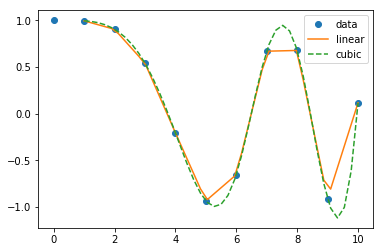

In [3]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x=np.linspace(0,10,num=11,endpoint=True)
y=np.cos(-x**2/9.0)

f=interp1d(x,y)
f2=interp1d(x,y,kind='cubic')

xnew=np.linspace(1,10,num=41,endpoint=True)

plt.plot(x,y,'o',xnew,f(xnew),'-',xnew,f2(xnew),'--')
plt.legend(['data','linear','cubic'],loc='best')
plt.show()

# Speedup
Tips:  
1. Panel data should combine with groupby to process tasks that needs to operator on multiple columns,such as regression.It is inefficient to use them operator on single series.  
2. Panel data should be treated as a method to store your multi dimension data rather than a tool a to peedup your calculation.
3. When you have to solve problems with a stacked panel data,you can take the following steps:
    1. operator on single column (or series) or multiple columns?
    2. If you are going to operate on single column,use `df.unstack()` to flatten the multiIndexed dataframe,and then process all the columns as the same time.Having finished the task,you can stacked them again if you want.  
    3. If you have to operate on multiple columns,use `groupby()` to process one by one.  

## operator on  multiple columns
take example of regression

In [27]:
import pandas as pd

multiPanel=pd.read_csv('df.csv',index_col=[0,1],parse_dates=True)
multiPanel.tail()

y        x1        x2
t          sid                              
2017-06-27 25  -0.029082  0.011374  0.001401
           26  -0.007860  0.011374  0.001401
           27   0.001400  0.011374  0.001401
           28  -0.003541  0.011374  0.001401
           30   0.002147  0.011374  0.001401

In [28]:
import statsmodels.formula.api as sm
from pandas.tseries.offsets import MonthEnd

def cal_beta(multiPanel):
    def _cal_beta(x):
        '''
        Following Scholes and Williams (1997) and Dimson and Mussavian (2000)
        '''
        result = sm.ols('y ~ x1 + x2', data=x).fit().params[['x1', 'x2']]
        return result.sum()

    def _beta_for_one_sid(x):
        x=x.reset_index('sid')
        _get_monthend=lambda dt:dt+MonthEnd(0)
        nx=x.groupby(_get_monthend).filter(lambda a:a.dropna().shape[0]>15)
        if nx.shape[0]>0:
            result=nx.groupby(_get_monthend).apply(_cal_beta)
            return result

    beta=multiPanel.groupby('sid').apply(_beta_for_one_sid)
    beta.index.names=['sid','t']
    beta.name='beta'
    return beta

In [29]:
beta=cal_beta(multiPanel)
beta.head()

sid  t         
1    2015-07-31    0.434395
     2015-08-31    0.643228
     2015-09-30    0.351977
     2015-10-31    0.569032
     2015-11-30    1.069203
Name: beta, dtype: float64

## operator on single column (or series)
take calculating rolling std for example

In [30]:
singlePanel=pd.read_csv('df.csv',index_col=[0,1],parse_dates=True)['y']
singlePanel.head()

t           sid
2015-06-09  1     -0.017990
            2     -0.026180
            4     -0.034446
            5      0.018722
            6      0.029600
Name: y, dtype: float64

### Method 1:unstack() and then operator on dataframe

In [31]:
_get_monthend=lambda dt:dt+MonthEnd(0)

def get_std1(ret):
    df=ret.unstack()
    std1=df.groupby(_get_monthend).apply(lambda x:x.dropna(axis=1,thresh=15).std())
    return std1

std1=get_std1(singlePanel)
std1.head()

            sid
2015-06-30  1      0.033034
            2      0.033837
            4      0.058045
            5      0.046788
            6      0.058258
dtype: float64

### Method 2: unstack() and them df.apply()

In [32]:
def get_std2(ret):
    df=ret.unstack()
    def _one_col(s):
        # s is singleIndex dataframe
        # filter out those sid with less 15 observations in a given month
        ns=s.groupby(_get_monthend).filter(lambda x:x.dropna().shape[0]>=15)
        result=ns.groupby(_get_monthend).apply(lambda x:x.std())
        return result

    std2=df.apply(_one_col)
    return std2

std2=get_std2(singlePanel)
std2.stack().head()

            sid
2015-06-30  1      0.033034
            2      0.033837
            4      0.058045
            5      0.046788
            6      0.058258
dtype: float64

### Method 3:groupby().apply

In [33]:
def get_std3(ret):
    df=ret.copy()
    
    def _one_sid(s):
        # s is multiIndex DataFrame
        s=s.reset_index('sid',drop=True)
        ns=s.groupby(_get_monthend).filter(lambda x:x.dropna().shape[0]>=15)
        result=ns.groupby(_get_monthend).apply(lambda x:x.std())
        return result

    std3=df.groupby('sid').apply(_one_sid)
    
    return std3

std3=get_std3(singlePanel)
std3.head()

sid            
1    2015-06-30    0.033034
     2015-07-31    0.041875
     2015-08-31    0.041027
     2015-09-30    0.025562
     2015-10-31    0.012893
Name: y, dtype: float64

### Comparison

In [42]:
%timeit get_std1(singlePanel)

23.4 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [43]:
%timeit get_std2(singlePanel)

265 ms ± 18.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
%timeit get_std3(singlePanel)

282 ms ± 6.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


As shown above,the **Method 1** is much faster.

# `API`
## General functions `pd.`
```python
# Data manupulations
pd.pivot(index,columns,values) # Produce 'pivot' table based on 3 columns of this DataFrame
pd.pivot_table(data[,values,index,columns,...]) # Create a spreadsheet-style pivot table as a DataFrame
pd.cut(x,bins[,right,labels,retbins,...])
pd.qcut(x,q[,labels,retbins,precision,...])

# Top-level missing data
pd.isna(obj)
pd.isnull(obj)
pd.notna(obj)
pd.notnull(objj)

# Top-level dealing with datetimelike
pd.to_datetime(arg[,errors,dayfirst,...])
pd.date_range([start,end,periods,freq,tx,...])
pd.period_range([start,end,periods,freq,name])
pd.timedelta_range([start,end,periods,freq,...])
```
## DataFrame
Refer to https://pandas.pydata.org/pandas-docs/stable/api.html  
### Attributes and underlying data
```python
df.as_matrix([columns])
df.memory_usage([index,deep])
```
### Conversion
```python
df.astype(dtype[,copy,errors])
df.isna()
df.notna()
```
### Indexing,iteration
```python
df.iteritems()
df.iterrows()
df.pop()
df.isin(values) #Return boolean DataFrame showing whether each element in the DataFrame is contained in values
df.where(cond[,other,inplace,...]） #Return an object of same shape as self and whose corresponding entries are from self where cond is True and otherwise are from other.
df.mask(cond[,other,inplace,axis,...]) # Return an object of same shape as self and whose corresponding entries are from self where cond id False and otherwise are from other.
```
### Binary operator functions
```python
df.lg(other[,axis,level])
```
### Function application,GroupBy & Window
```python
df.apply(func[,axis,broadcast,...])
df.applymap(func) #elementwise
df.aggregate(func[,axis])
df.transform(func,*args,**kwargs)
df.groupby([by,axis,level,...])
df.rolling(window[,min_periods,...])
df.expanding([min_periods,freq,...])
df.ewm([com,span,halflife,alpha,...])
```
### Computations /Descriptive Stats
```python
df.clip([lower,upper,axis,inplace]) # Trim values as input with values below given value(s) truncated
df.clip_lower(threshold[,axis,inplace])
df.clip_upper(threshold[,axis,inplace])
df.cummin([axis,skipna])
df.cumsum([axis,skipna])
df.describe([percentiles,include,...])
df.diff([periods,axis]) # 1st discrete difference of object
df.mad([axis,skipna,level]) # Return the mean absolute deviation of the values for the requested axis
df.pct_change([periods,fill_method,...])
df.quantile([q,axis,numeric_only,...]) # Return values as the given quantile over requested axis,a la numpy percentile.
df.rank([axis,method,numberic_only,...])
df.sem([axis,skipna,level,ddof,...]) # Return unbiased standard error of the mean over requested axis.
```
### Reindexing / Selection / Label manipulation
```python
df.drop([labels,axis,index,...]) # Return new object with labels in requested axis remove.
df.drop_duplicates([subset,keep,...])# Return DataFrame with duplicate rows removed,optionally only
df.duplicated([subset,keep]) # Return boolean series denoting duplicate rows,optionally only
df.filter([items,like,regex,axis]) # Subset rows or columns of dataframe according to labels in teh specified index.
df.idxmin([axis,skipna])
df.idxmax([axis,skipna])
df.last(offset)
df.reindex([labels,index,columns,...])
df.reset_index([level,drop,...])
df.set_index(keys,[,drop,append,...]) # Set the DataFrame index (row labels) using one or more existing columns
df.rename([mapper,index,columns,...]) # Alter axes labels
df.sample([n,frac,replace,...]) # Returns a random sample of items from an axis of object
df.truncate([before,after,axis,copy]) # Truncates a sorted DataFrame/Series before and/or after some particular index value
```
### Missing data handling
```python
df.dropna([axis,how,thresh,...])
df.fillna([value,method,axis,...])
df.replace([to_replace,value,...]) # replace values given in 'to_replace' with 'value'
```
## Reshaping,sorting,transposing
```python
df.pivot([index,columns,values]) # Reshape data (produce a 'pivot' table) based on column values.
df.reorder_levels(order[,axis]) # Rearrange index levels using input order
df.swaplevel([i,j,axis]) # Swap levels i and j in a MultiIndex on a particular axis
df.sort_values(by[,axis,ascending,...])
df.sort_index([axis,level,...])
df.nlargest(n,columns[,keep])
df.stack([level,dropna])
df.unstak([level,fill_value])
```
### Combining / joining / merging
```python
df.append(other,[,ignore_index,...])
```
### Time series-related
```python
df.asfreq(freq,[,method,how,...])
df.first_valid_index() # Return index for first non-NA/null value
df.last_valid_index()
df.resample(rule[,how,axis,...])
```
### Serialization / IO / Conversion
```python
df.to_html() # Render a DataFrame as an HTML table
df.to_latex()
df.to_clipboard()

```
### The others
```python
df.gt(df2)
df2.ne(df)

(df>0).any()
(df>0).any().all()

df.clip(-0.1,0.1)
df.clip_lower(threshold[,axis,inplace]) # Return copy of the input with values below given value(s) truncated.
df.clip_upper(threshold[,axis,inplace])
df.truncate(before=2,after=4)
df.mask()
df.rank()
df.last()

df.autocorr(lag=1) # Lag-N autocorrelation
df.cummax()
df.cumsum()

df.idxmax(axis=0,skipna=0)
df.nsmallest(n,columns='a')
df.first_valid_index() # Return index for first non-NA/null value
df.last_valid_index()
df.last()

df.tshift(periods=3)
df.unique(axis=0,dropna=True)

df.replace(to_replace=None,value=None)

df.to_dict()
df.to_html()
df.to_latex()
df.quantile()

df.iteritems()

df.drop_duplicates(subset=None,keep='first',inplace=False)

```
## Index
Many of these methods or variants thereof are available on the objects that contain an index (Series/DataFrame).  
### Attributes
```python
Index.is_mononic
Index.is_mononic_increasing
Index.is_unique
```
### Modifying and Computations
```python
Index.argmin([axis]) # Return a ndarray of the maximum argument indexer
Index.drop_duplicates([keep])
Index.duplicated([keep])
Index.min()
Index.unique()
Index.value_counts()
```
### Sorting
```python
Index.sort_values([return_indexer,ascending]) # Return sorted copy of index
Index.argsort(*args,**kwargs) # Return the indices that would sort the index and its underlying data
```
### Combining / joining /set operations
```python
Index.join(other[,how,level,...])
Index.union(other)
Index.difference(other)
```
### Selecting
```python
Index.get_level_values(level) # Return an index of values for requested level,equal to the length of the index
Index.isin(values[,level])
```
### MultiIndex
```python
MultiIndex.set_levels(levels[,level,...]) # Set new levels on MultiIndex
MultiIndex.droplevel([level]) # Return index with requested level removed
MultiIndex.swaplevel([i,j]) # Swap level i with level j
```
### DatetimeIndex
```python
DatetimeIndex.year
DatetimeIndex.is_year_start

DatetimeIndex.to_datetime([dayfirst])
```
### Timesamp
TimeStamp is the pandas equivalent of python's Datetime and is interchangable with it in most cases.
```python
Timestamp.hour
Timestamp.is_quarter_end

Timestamp.strftime
Timestamp.strptime
```
## Window
### Standard moving window functions
```python
Rolling.count()
Rolling.mean()
Rolling.quantile(quantile,**kwargs)

Rolling.apply(func[,args,kwargs])

Window.mean(*args,**kwargs) # window mean
Window.sum(*args,**kwargs) # window sum
```
### Standard expanding window functions
```python
Expanding.count()
Expanding.kurt()
Expanding.quantile()

Expanding.apply(func[,args,kwargs])

```
### `EWM`
Exponentially-weighted moving window functions
```python
EWM.mean()
EWM.cov()
```
## GroupBy
```python
# Function application
GroupBy.apply(func,*args,*kwargs)
GroupBy.aggregate(func,*args,**kwargs)
GroupBy.transform(func,*args,**kwargs)

## Computations / Descriptive Stats
GroupBy.count()
GroupBy.nth(n[,dropna])
GroupBy.cummax([axis])
GroupBy.ffill([limit])
GroupBy.idxmin()
GroupBy.pct_change()
GroupBy.resample(rule,*args,**kwargs)
GroupBy.tshift()
GroupBy.nlargest()
```

## Resample
```python
# Upsampling
Resampler.ffill([limit])
Resample.fillna(method[,limit])

# Computations / Descriptive Stats
Resampler.count([_method])
Resampler.std([ddof])
```
## Style
`Styler` objects are returned by `pandas.DataFrame.style`.
```python
Styler.apply(func[,axis,subset]) # Apply a function column-wise,row-wise,or table-wise,updating the HTML representation with the result
Styler.applymap(func[,subset]) # elementwise
Styler.set_caption(caption)
Styler.set_table_styles(table_styles)

Styler.highlight_max([subset,color,axis])
Styler.highlight_min([subset,color,axis])
Styler.highlight_null([null_color])

Styler.render(**kwargs) # Render the built up styles to HTML
Styler.export() # Export the styles to applied to the current Styler
Styler.use(styles)

```
## General utility functions
```python
describe_option(pat[,_print_desc])
reset_option(pat)
get_option(pat)
set_option(pat)
```